In [ ]:
%whos

In [1]:
key = pd.read_csv('../data/key.csv')
train = pd.read_csv('../data/train.csv')
weather = pd.read_csv('../data/weather.csv')
test = pd.read_csv('../data/test.csv')

In [2]:
train['log_units'] = np.log(train['units'] + 1)
train.tail()

date  store_nbr  item_nbr  units  log_units
4617595  2014-10-31         45       107      0        0.0
4617596  2014-10-31         45       108      0        0.0
4617597  2014-10-31         45       109      0        0.0
4617598  2014-10-31         45       110      0        0.0
4617599  2014-10-31         45       111      0        0.0

In [3]:
train_new = train[:2255853] # 2013년 3월 31일까지의 train data

In [4]:
weather_train = weather[:8968] # 2013년 3월 31일까지의 weather data

### weather 관련 functions

In [5]:
def get_weather_train(df, station_nbr) : # staion_nbr에 따라서 weather train dataframe을 만드는 함수
    new_df = df[df['station_nbr'] == station_nbr]
    new_df.reset_index(drop = True, inplace = True)
    return new_df    

In [6]:
def set_tmax(df) : # tmax의 missing value를 처리하는 함수
    for num in range(len(df)) :  # tmax의 missing value 처리,,, 이틀 전날의 0.2배 + 하루 전날의 0.8배
        if df.at[num, 'tmax'] == 'M' :
            df.set_value(num, 'tmax', int(0.2 * int(df.at[num - 2, 'tmax']) + 0.8 * int(df.at[num - 1, 'tmax'])))
        
        else :
            df.at[num, 'tmax'] = int(df.at[num, 'tmax'])

In [7]:
def set_tmin(df) : # tmin의 missing value를 처리하는 함수
    for num in range(len(df)) :  # tmax의 missing value 처리,,, 이틀 전날의 0.2배 + 하루 전날의 0.8배
        if df.at[num, 'tmin'] == 'M' :
            df.set_value(num, 'tmin', int(0.2 * int(df.at[num - 2, 'tmin']) + 0.8 * int(df.at[num - 1, 'tmin'])))
            
        else :
            df.at[num,'tmin'] = int(df.at[num, 'tmin'])

In [8]:
def set_tavg(df) : # tavg의 값을 처리하는 함수
    for num in range(len(df)) :
        if df.at[num, 'tavg'] == 'M' :
            df.set_value(num, 'tavg', int((df.at[num, 'tmax'] + df.at[num, 'tmin']) / 2))
            
        else :
            df.at[num, 'tavg'] = int(df.at[num, 'tavg'])
    

In [ ]:
def set_depart(df) : # how can I get depart value..wtf

In [ ]:
def set_dewpoint(df) :

In [ ]:
def set_wetbulb(df) :

In [9]:
def set_heat_cool(df) : # heat, cool의 missing value 처리
    for num in range(len(df)) :
        if df.at[num, 'heat'] == 'M' or df.at[num, 'cool'] == 'M' :
            
            if df.at[num, 'tavg'] == 65 : # tavg == 65 이면 heat, cool 모두 0
                df.set_value(num, 'heat', 0)
                df.set_value(num, 'cool', 0)
            
            elif df.at[num, 'tavg'] > 65 : #tavg > 65 이면 heat = 0, cool = tavg - 65
                df.set_value(num, 'heat', 0)
                df.set_value(num, 'cool', df.at[num, 'tavg'] - 65)
            
            else : #tavg < 65 이면 heat = 65 - tavg, cool = 0
                df.set_value(num, 'heat', 65 - df.at[num, 'tavg'])
                df.set_value(num, 'cool', 0)

In [ ]:
def set_snowfall_preciptotal(df) :

In [ ]:
def set_stnpressure(df) :

In [ ]:
def set_sealevel(df) :

In [ ]:
def set_resultspeed(df) : # 바람관련 column 3개는 어떤 연관관계가 있지않을까..

In [ ]:
def set_resultdir(df) :

In [ ]:
def set_avgspeed(df) :

### train 관련 functions

In [10]:
def get_train_train(df, store_nbr) : # store_nbr에 따라 train data를 나눠주는 함수
    new_df = df[df['store_nbr'] == store_nbr]
    new_df.reset_index(drop = True, inplace = True)
    return new_df

In [ ]:
def merge_train_new(*args) : # 하나의 station을 공유하는 store들을 merge하는 함수

In [68]:
#21, 29, 33
result = pd.concat([train_new_21, train_new_29, train_new_33])
result.pivot_table(values = 'log_units', index = ['date'], columns = ['item_nbr'])

item_nbr    1    2    3    4         5    6    7         8         9    10   \
date                                                                          
2012-01-01  0.0  0.0  0.0  0.0  1.359179  0.0  0.0  0.902683  1.711933  0.0   
2012-01-02  0.0  0.0  0.0  0.0  1.642418  0.0  0.0  1.072959  1.759372  0.0   
2012-01-03  0.0  0.0  0.0  0.0  1.310609  0.0  0.0  1.329661  1.736495  0.0   
2012-01-04  0.0  0.0  0.0  0.0  1.221187  0.0  0.0  1.155245  1.420893  0.0   
2012-01-05  0.0  0.0  0.0  0.0  1.510866  0.0  0.0  1.386294  1.946881  0.0   
2012-01-06  0.0  0.0  0.0  0.0  1.452236  0.0  0.0  1.212529  1.584530  0.0   
2012-01-07  0.0  0.0  0.0  0.0  1.165503  0.0  0.0  1.030347  1.732832  0.0   
2012-01-08  0.0  0.0  0.0  0.0  1.649587  0.0  0.0  1.317081  1.871043  0.0   
2012-01-09  0.0  0.0  0.0  0.0  1.317081  0.0  0.0  1.098612  1.687532  0.0   
2012-01-10  0.0  0.0  0.0  0.0  1.411369  0.0  0.0  1.391462  1.929987  0.0   
2012-01-11  0.0  0.0  0.0  0.0  1.221187  0.0  0.0  0.879686  1.528322  0.0   
2012-01-12  0.0  0.0  0.0  0.0  1.098612  0.0  0.0  1.072959  1.528322  0.0   
2012-01-13  0.0  0.0  0.0  0.0  1.165503  0.0  0.0  0.963457  1.642418  0.0   
2012-01-14  0.0  0.0  0.0  0.0  1.194506  0.0  0.0  0.924196  1.601340  0.0   
2012-01-15  0.0  0.0  0.0  0.0  1.253733  0.0  0.0  1.165503  1.723495  0.0   
2012-01-16  0.0  0.0  0.0  0.0  0.998577  0.0  0.0  1.175454  1.425555  0.0   
2012-01-17  0.0  0.0  0.0  0.0  1.194506  0.0  0.0  1.155245  1.598597  0.0   
2012-01-18  0.0  0.0  0.0  0.0  1.464816  0.0  0.0  1.086032  1.391462  0.0   
2012-01-19  0.0  0.0  0.0  0.0  1.221187  0.0  0.0  0.879686  1.528322  0.0   
2012-01-20  0.0  0.0  0.0  0.0  1.229626  0.0  0.0  1.110735  1.524904  0.0   
2012-01-21  0.0  0.0  0.0  0.0  1.229626  0.0  0.0  1.253733  1.649587  0.0   
2012-01-22  0.0  0.0  0.0  0.0  1.283383  0.0  0.0  1.059351  1.796357  0.0   
2012-01-23  0.0  0.0  0.0  0.0  1.290400  0.0  0.0  1.144662  1.601340  0.0   
2012-01-24  0.0  0.0  0.0  0.0  1.221187  0.0  0.0  1.144662  1.329661  0.0   
2012-01-25  0.0  0.0  0.0  0.0  1.144662  0.0  0.0  0.981480  1.406503  0.0   
2012-01-26  0.0  0.0  0.0  0.0  1.144662  0.0  0.0  1.045165  1.283383  0.0   
2012-01-27  0.0  0.0  0.0  0.0  1.221187  0.0  0.0  1.261397  1.268887  0.0   
2012-01-28  0.0  0.0  0.0  0.0  1.406503  0.0  0.0  0.924196  1.420893  0.0   
2012-01-29  0.0  0.0  0.0  0.0  1.335778  0.0  0.0  1.381045  1.658911  0.0   
2012-01-30  0.0  0.0  0.0  0.0  1.030347  0.0  0.0  1.045165  1.637552  0.0   
...         ...  ...  ...  ...       ...  ...  ...       ...       ...  ...   
2013-03-02  0.0  0.0  0.0  0.0  1.443578  0.0  0.0  1.283383  1.484782  0.0   
2013-03-03  0.0  0.0  0.0  0.0  1.430153  0.0  0.0  1.290400  1.741916  0.0   
2013-03-04  0.0  0.0  0.0  0.0  1.072959  0.0  0.0  1.229626  1.375711  0.0   
2013-03-05  0.0  0.0  0.0  0.0  1.472947  0.0  0.0  1.468906  1.689635  0.0   
2013-03-06  0.0  0.0  0.0  0.0  1.155245  0.0  0.0  1.253733  1.578733  0.0   
2013-03-07  0.0  0.0  0.0  0.0  1.391462  0.0  0.0  1.268887  1.425555  0.0   
2013-03-08  0.0  0.0  0.0  0.0  0.944404  0.0  0.0  0.981480  1.341784  0.0   
2013-03-09  0.0  0.0  0.0  0.0  1.144662  0.0  0.0  1.229626  1.566827  0.0   
2013-03-10  0.0  0.0  0.0  0.0  1.406503  0.0  0.0  1.434688  1.755953  0.0   
2013-03-11  0.0  0.0  0.0  0.0  1.253733  0.0  0.0  1.503620  1.276214  0.0   
2013-03-12  0.0  0.0  0.0  0.0  1.110735  0.0  0.0  1.122432  1.420893  0.0   
2013-03-13  0.0  0.0  0.0  0.0  1.203639  0.0  0.0  1.304008  1.617343  0.0   
2013-03-14  0.0  0.0  0.0  0.0  1.212529  0.0  0.0  0.767528  1.245890  0.0   
2013-03-15  0.0  0.0  0.0  0.0  1.086032  0.0  0.0  0.963457  1.472947  0.0   
2013-03-16  0.0  0.0  0.0  0.0  0.693147  0.0  0.0  1.185116  1.656604  0.0   
2013-03-17  0.0  0.0  0.0  0.0  1.575796  0.0  0.0  1.430153  1.510866  0.0   
2013-03-18  0.0  0.0  0.0  0.0  1.110735  0.0  0.0  1.253733  1.656604  0.0   
2013-03-19  0.0  0.0  0.0  0.0  1.341784  0.0  0.0

### weather와 train data를 합쳐주는 함수
- train data 중 log_units != 0 인 item들만 합쳐줌.. (log_units != 0 이면 units != 0)

In [15]:
def merge_weather_train(weather, train) :
    train_pivot = train.pivot_table(values = 'log_units', index = ['date'], columns = ['item_nbr'])
    train_pivot = train_pivot.loc[:, (train_pivot != 0).any(axis = 0)] # log_units이 모두 0인 item_nbr(column)을 삭제..
    train_pivot.loc['2012-12-25'] = 0 # 2012-12-25의 data를 0으로 추가... 원래 없었던 data이므로 0으로 설정함
    
    list_item_nbr = train_pivot.columns # units 전체가 0이 아닌 item_nbr들을 list형태로 받음
#     length = len(train_pivot.columns) # units전체가 0이 아닌 item_nbr이 총 몇개 있는지..
        
    train_pivot.index.name = "date"
    train_pivot.reset_index(inplace = True)
    train_pivot.sort_values(by = 'date', inplace = True)
    train_pivot.reset_index(drop = True, inplace = True)
    
    for num in list_item_nbr :
        weather[num] = train_pivot[num]
    
    return weather

In [47]:
def get_item_nbr(df) : # 모든 units이 0이 아닌 item_nbr을 구하는 함수, list형태로 return
    elements = df.columns # 모든 column name을 list로 받는다.
    result = []
    
    for element in elements :
        if type(element) != str :
            result.append(element)
    
    return result

In [12]:
#station_nbr로 weather_train을 나눠줌
# 박두진 강사님이 이 부분을 줄일 수 있는 방법을 찾아봐주신다 하였음..일단은 그냥 쓰자!

weather_train_1 = get_weather_train(weather_train, 1)
weather_train_2 = get_weather_train(weather_train, 2)
weather_train_3 = get_weather_train(weather_train, 3)
weather_train_4 = get_weather_train(weather_train, 4)
weather_train_5 = get_weather_train(weather_train, 5) # missing value가 많아서 일단은..
weather_train_6 = get_weather_train(weather_train, 6)
weather_train_7 = get_weather_train(weather_train, 7)
weather_train_8 = get_weather_train(weather_train, 8)
weather_train_9 = get_weather_train(weather_train, 9)
weather_train_10 = get_weather_train(weather_train, 10)
weather_train_11 = get_weather_train(weather_train, 11)
weather_train_12 = get_weather_train(weather_train, 12)
weather_train_13 = get_weather_train(weather_train, 13)
weather_train_14 = get_weather_train(weather_train, 14)
weather_train_15 = get_weather_train(weather_train, 15)
weather_train_16 = get_weather_train(weather_train, 16)
weather_train_17 = get_weather_train(weather_train, 17)
weather_train_18 = get_weather_train(weather_train, 18)
weather_train_19 = get_weather_train(weather_train, 19)
weather_train_20 = get_weather_train(weather_train, 20)

In [13]:
train_new_1 = get_train_train(train_new, 1)
train_new_2 = get_train_train(train_new, 2)
train_new_3 = get_train_train(train_new, 3)
train_new_4 = get_train_train(train_new, 4)
train_new_5 = get_train_train(train_new, 5)
train_new_6 = get_train_train(train_new, 6)
train_new_7 = get_train_train(train_new, 7)
train_new_8 = get_train_train(train_new, 8)
train_new_9 = get_train_train(train_new, 9)
train_new_10 = get_train_train(train_new, 10)
train_new_11 = get_train_train(train_new, 11)
train_new_12 = get_train_train(train_new, 12)
train_new_13 = get_train_train(train_new, 13)
train_new_14 = get_train_train(train_new, 14)
train_new_15 = get_train_train(train_new, 15)
train_new_16 = get_train_train(train_new, 16)
train_new_17 = get_train_train(train_new, 17)
train_new_18 = get_train_train(train_new, 18)
train_new_19 = get_train_train(train_new, 19)
train_new_20 = get_train_train(train_new, 20)
train_new_21 = get_train_train(train_new, 21)
train_new_22 = get_train_train(train_new, 22)
train_new_23 = get_train_train(train_new, 23)
train_new_24 = get_train_train(train_new, 24)
train_new_25 = get_train_train(train_new, 25)
train_new_26 = get_train_train(train_new, 26)
train_new_27 = get_train_train(train_new, 27)
train_new_28 = get_train_train(train_new, 28)
train_new_29 = get_train_train(train_new, 29)
train_new_30 = get_train_train(train_new, 30)
train_new_31 = get_train_train(train_new, 31)
train_new_32 = get_train_train(train_new, 32)
train_new_33 = get_train_train(train_new, 33)
train_new_34 = get_train_train(train_new, 34)
train_new_35 = get_train_train(train_new, 35)
train_new_36 = get_train_train(train_new, 36)
train_new_37 = get_train_train(train_new, 37)
train_new_38 = get_train_train(train_new, 38)
train_new_39 = get_train_train(train_new, 39)
train_new_40 = get_train_train(train_new, 40)
train_new_41 = get_train_train(train_new, 41)
train_new_42 = get_train_train(train_new, 42)
train_new_43 = get_train_train(train_new, 43)
train_new_44 = get_train_train(train_new, 44)
train_new_45 = get_train_train(train_new, 45)

## 각 dataframe별로 뒤에 붙는 숫자에 주의해야함
- station_nbr 기준인지 store_nbr 기준인지...

### station_nbr == 1
- store_nbr == 1

In [48]:
set_tmax(weather_train_1)
set_tmin(weather_train_1)
set_tavg(weather_train_1)
set_heat_cool(weather_train_1)

merged_1 = merge_weather_train(weather_train_1, train_new_1)
item_nbr_list_1 = get_item_nbr(merged_1)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


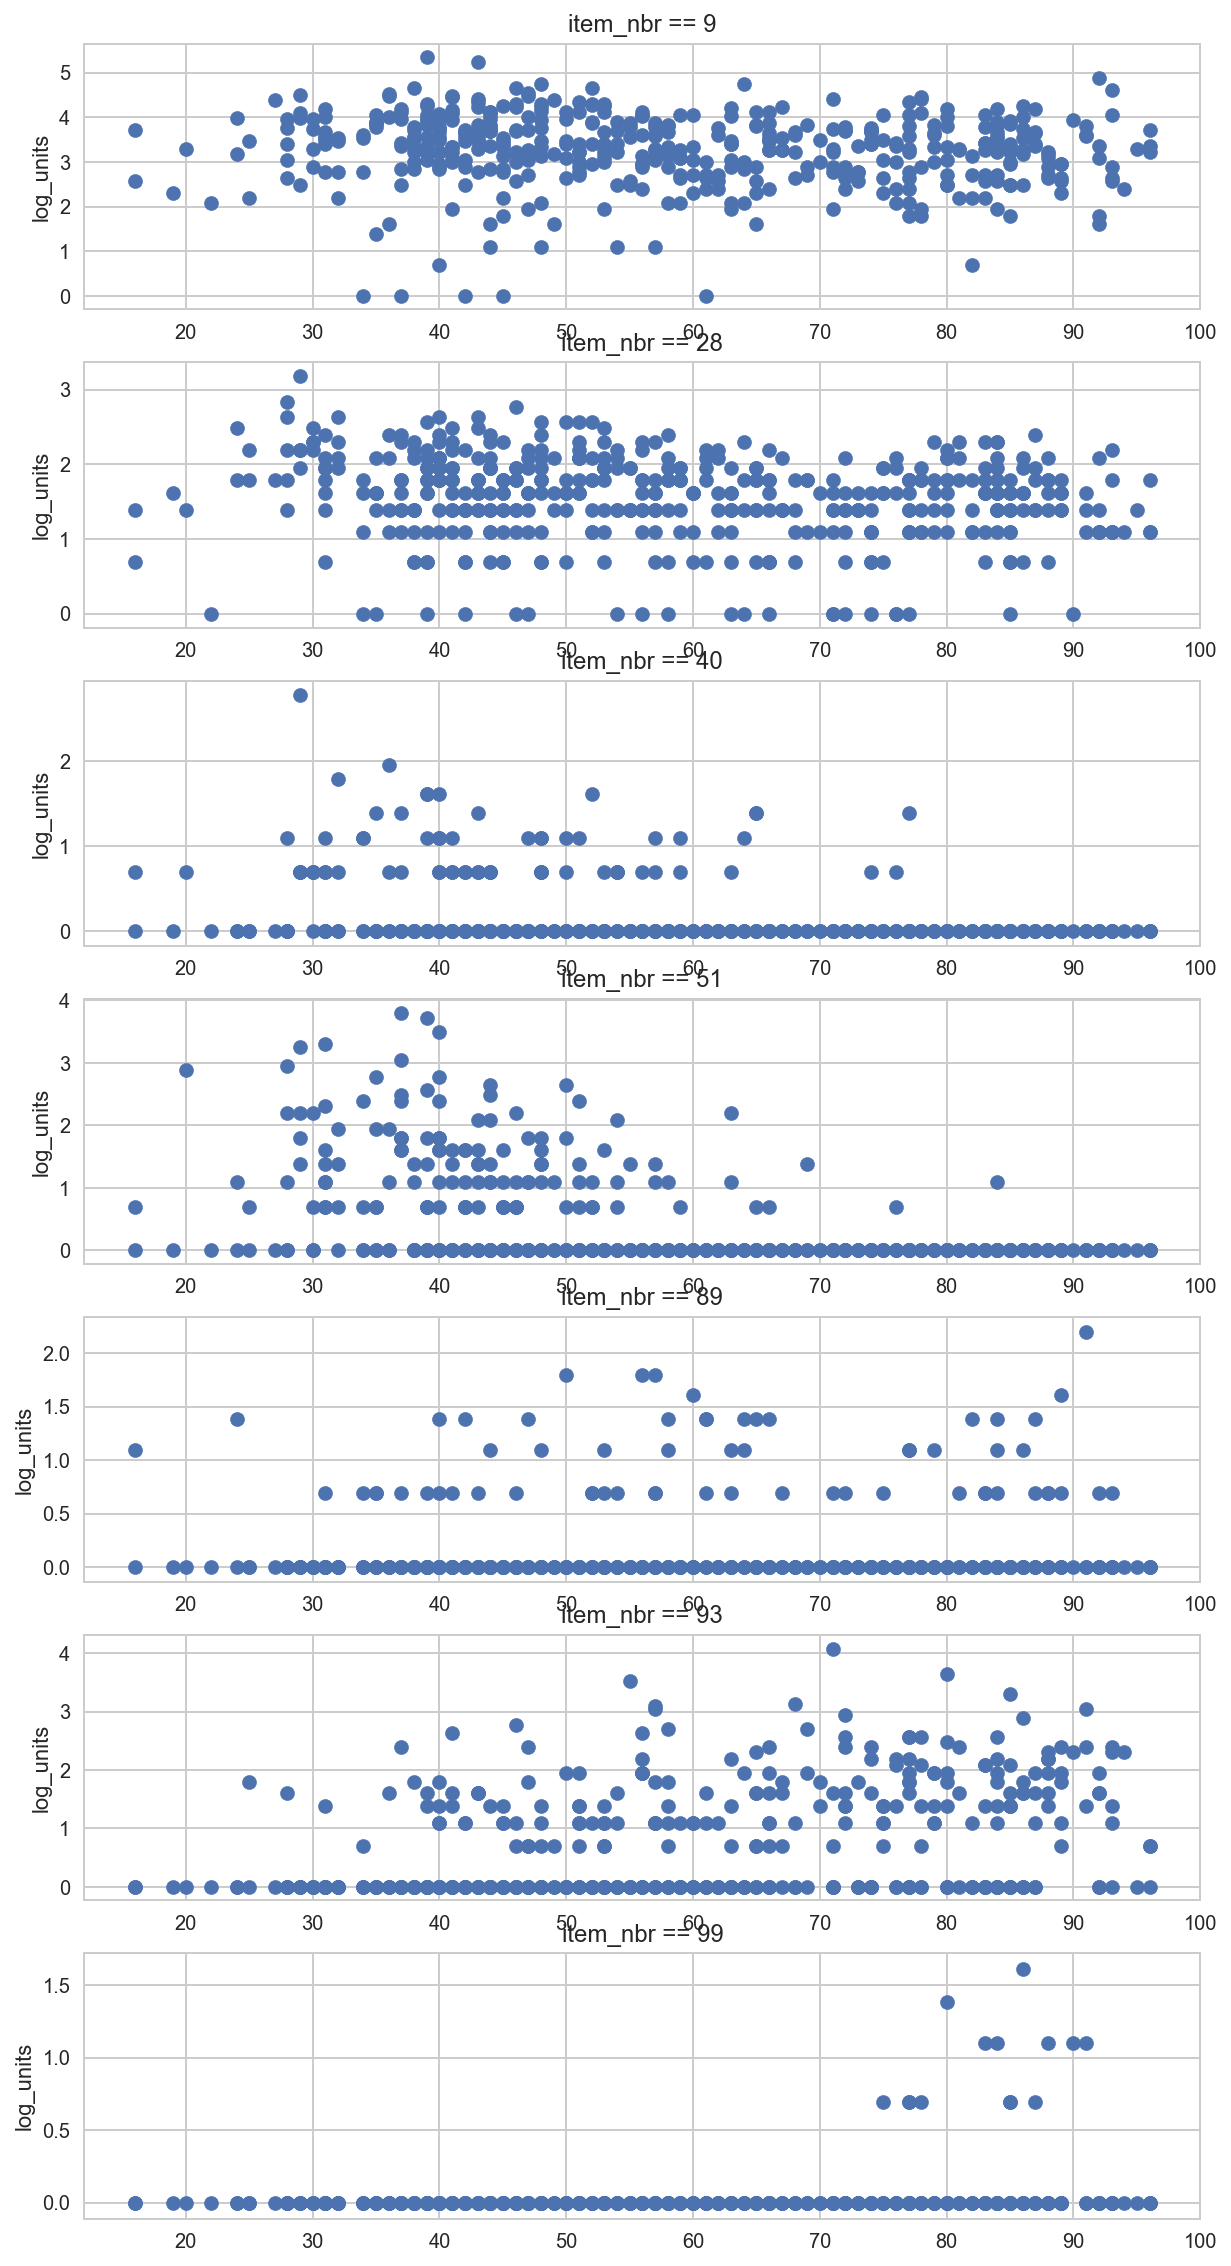

In [58]:
plt.figure(figsize = (10, 20))
plotcount = 1
for num in item_nbr_list_1 :
    plt.subplot(len(item_nbr_list_1), 1, plotcount)
    plt.scatter(x = merged_1['tmax'], y = merged_1[num]) # x에 들어가는 column을 바꿔가며 관계시각화 가능..pairplot은 왜 안되지 ㅅㅂ
    
    plt.ylabel('log_units')
#     plt.ylabel('log_units of item_nbr == {}'.format(num))

    plt.title('item_nbr == {}'.format(num))
        
    plotcount += 1

###  station_nbr == 2
- store_nbr == 16

In [73]:
set_tmax(weather_train_2)
set_tmin(weather_train_2)
set_tavg(weather_train_2)
set_heat_cool(weather_train_2)

merged_2 = merge_weather_train(weather_train_2, train_new_16)
item_nbr_list_2 = get_item_nbr(merged_2)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


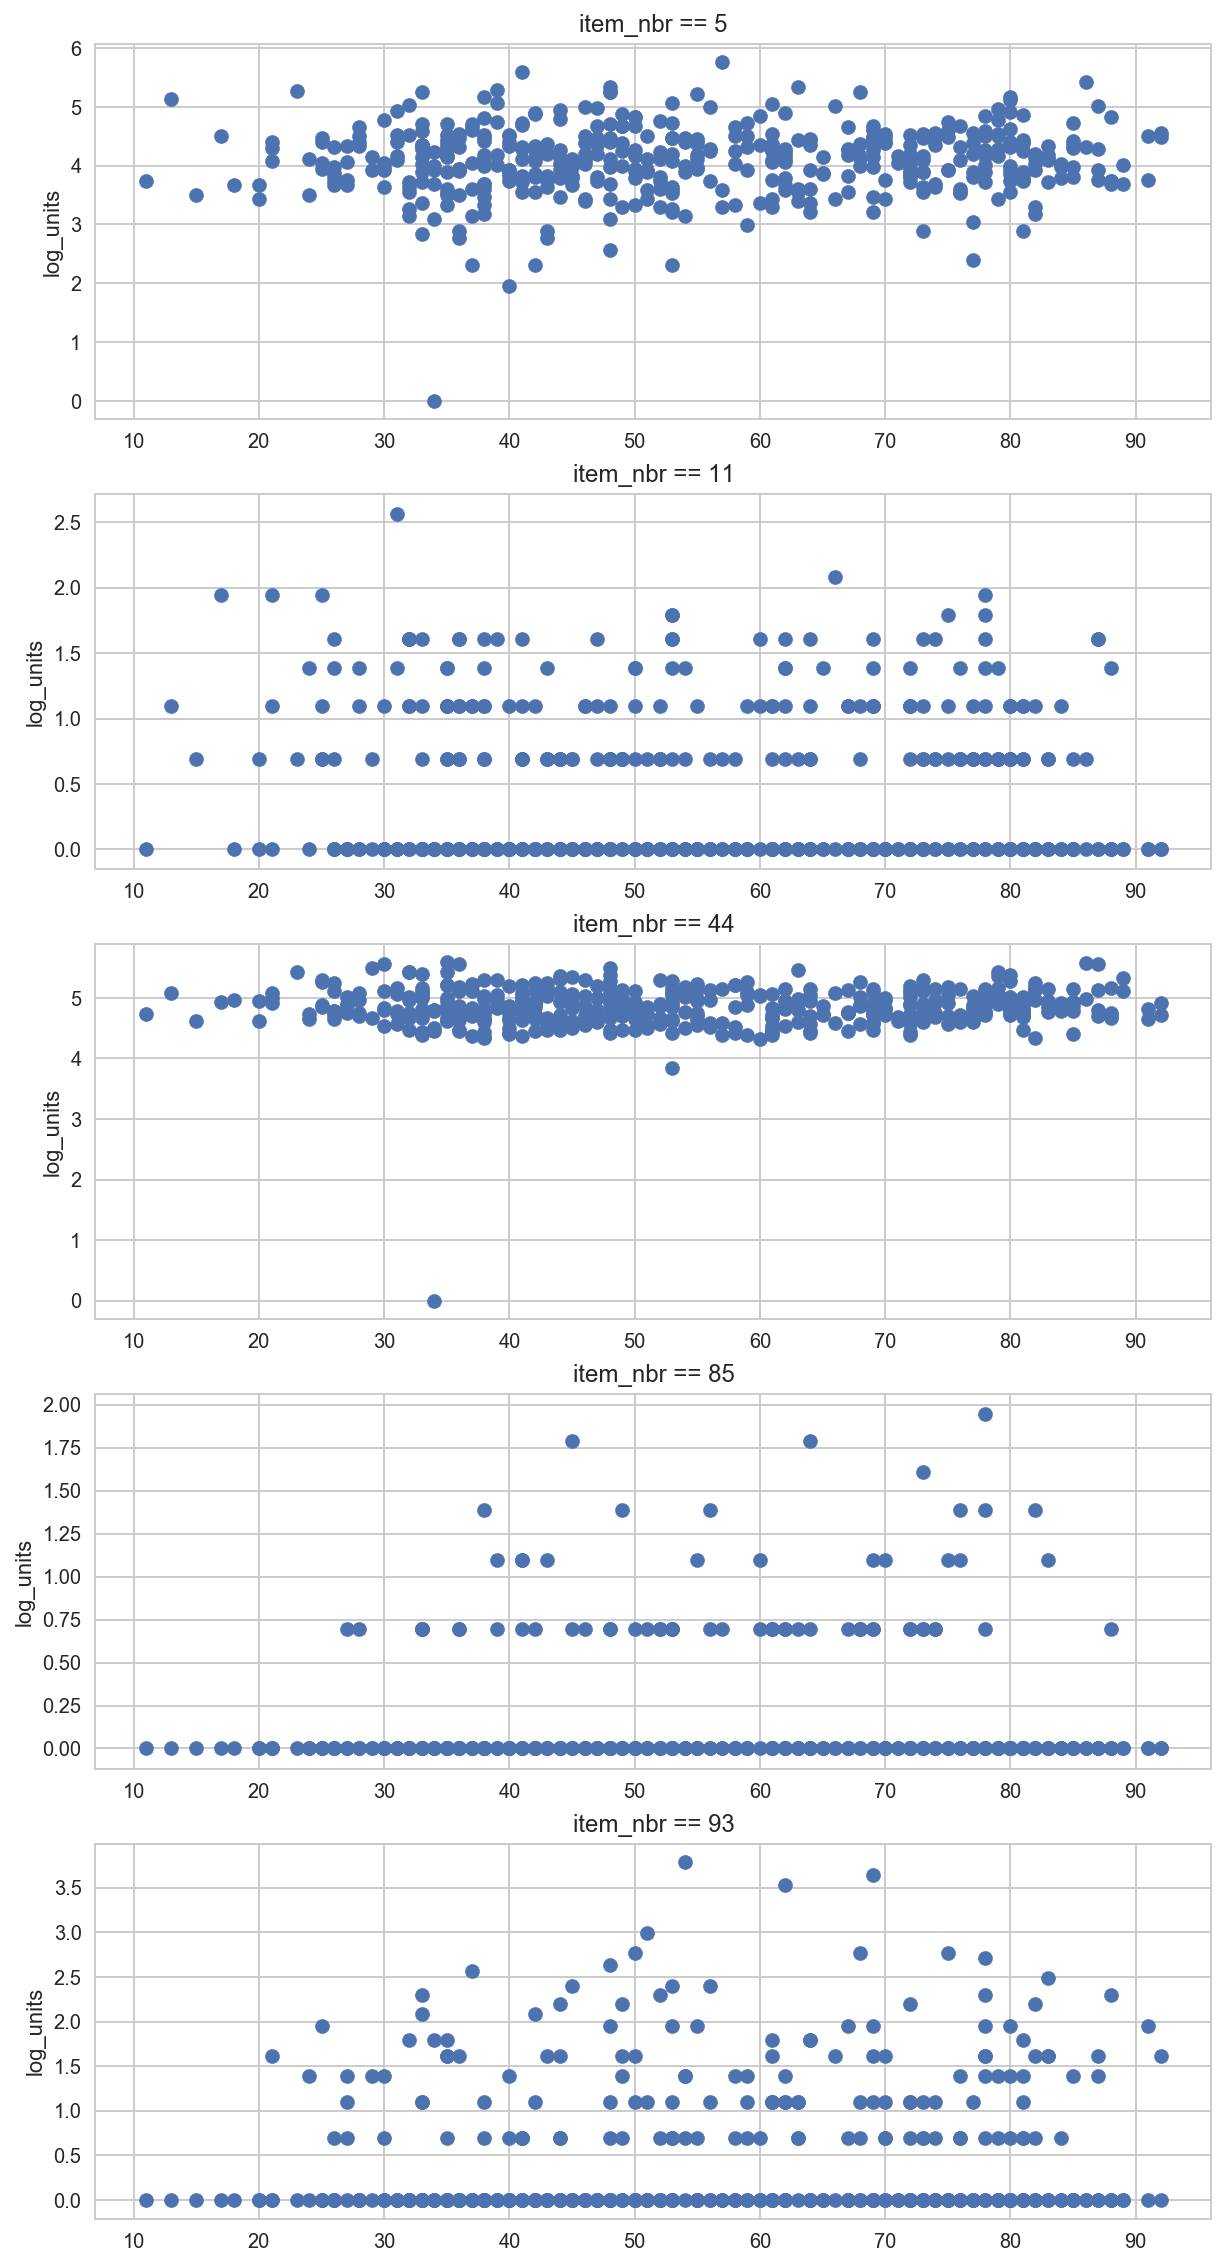

In [72]:
plt.figure(figsize = (10, 20))
plotcount = 1
for num in item_nbr_list_2 :
    plt.subplot(len(item_nbr_list_2), 1, plotcount)
    plt.scatter(x = merged_2['tmax'], y = merged_2[num]) # x에 들어가는 column을 바꿔가며 관계시각화 가능..pairplot은 왜 안되지 ㅅㅂ
    
    plt.ylabel('log_units')
#     plt.ylabel('log_units of item_nbr == {}'.format(num))

    plt.title('item_nbr == {}'.format(num))
        
    plotcount += 1

### station_nbr == 3
- store_nbr == 21, 29, 33

In [69]:
result = pd.concat([train_new_21, train_new_29, train_new_33])

set_tmax(weather_train_3)
set_tmin(weather_train_3)
set_tavg(weather_train_3)
set_heat_cool(weather_train_3)

merged_3 = merge_weather_train(weather_train_3, result)
item_nbr_list_3 = get_item_nbr(merged_3)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


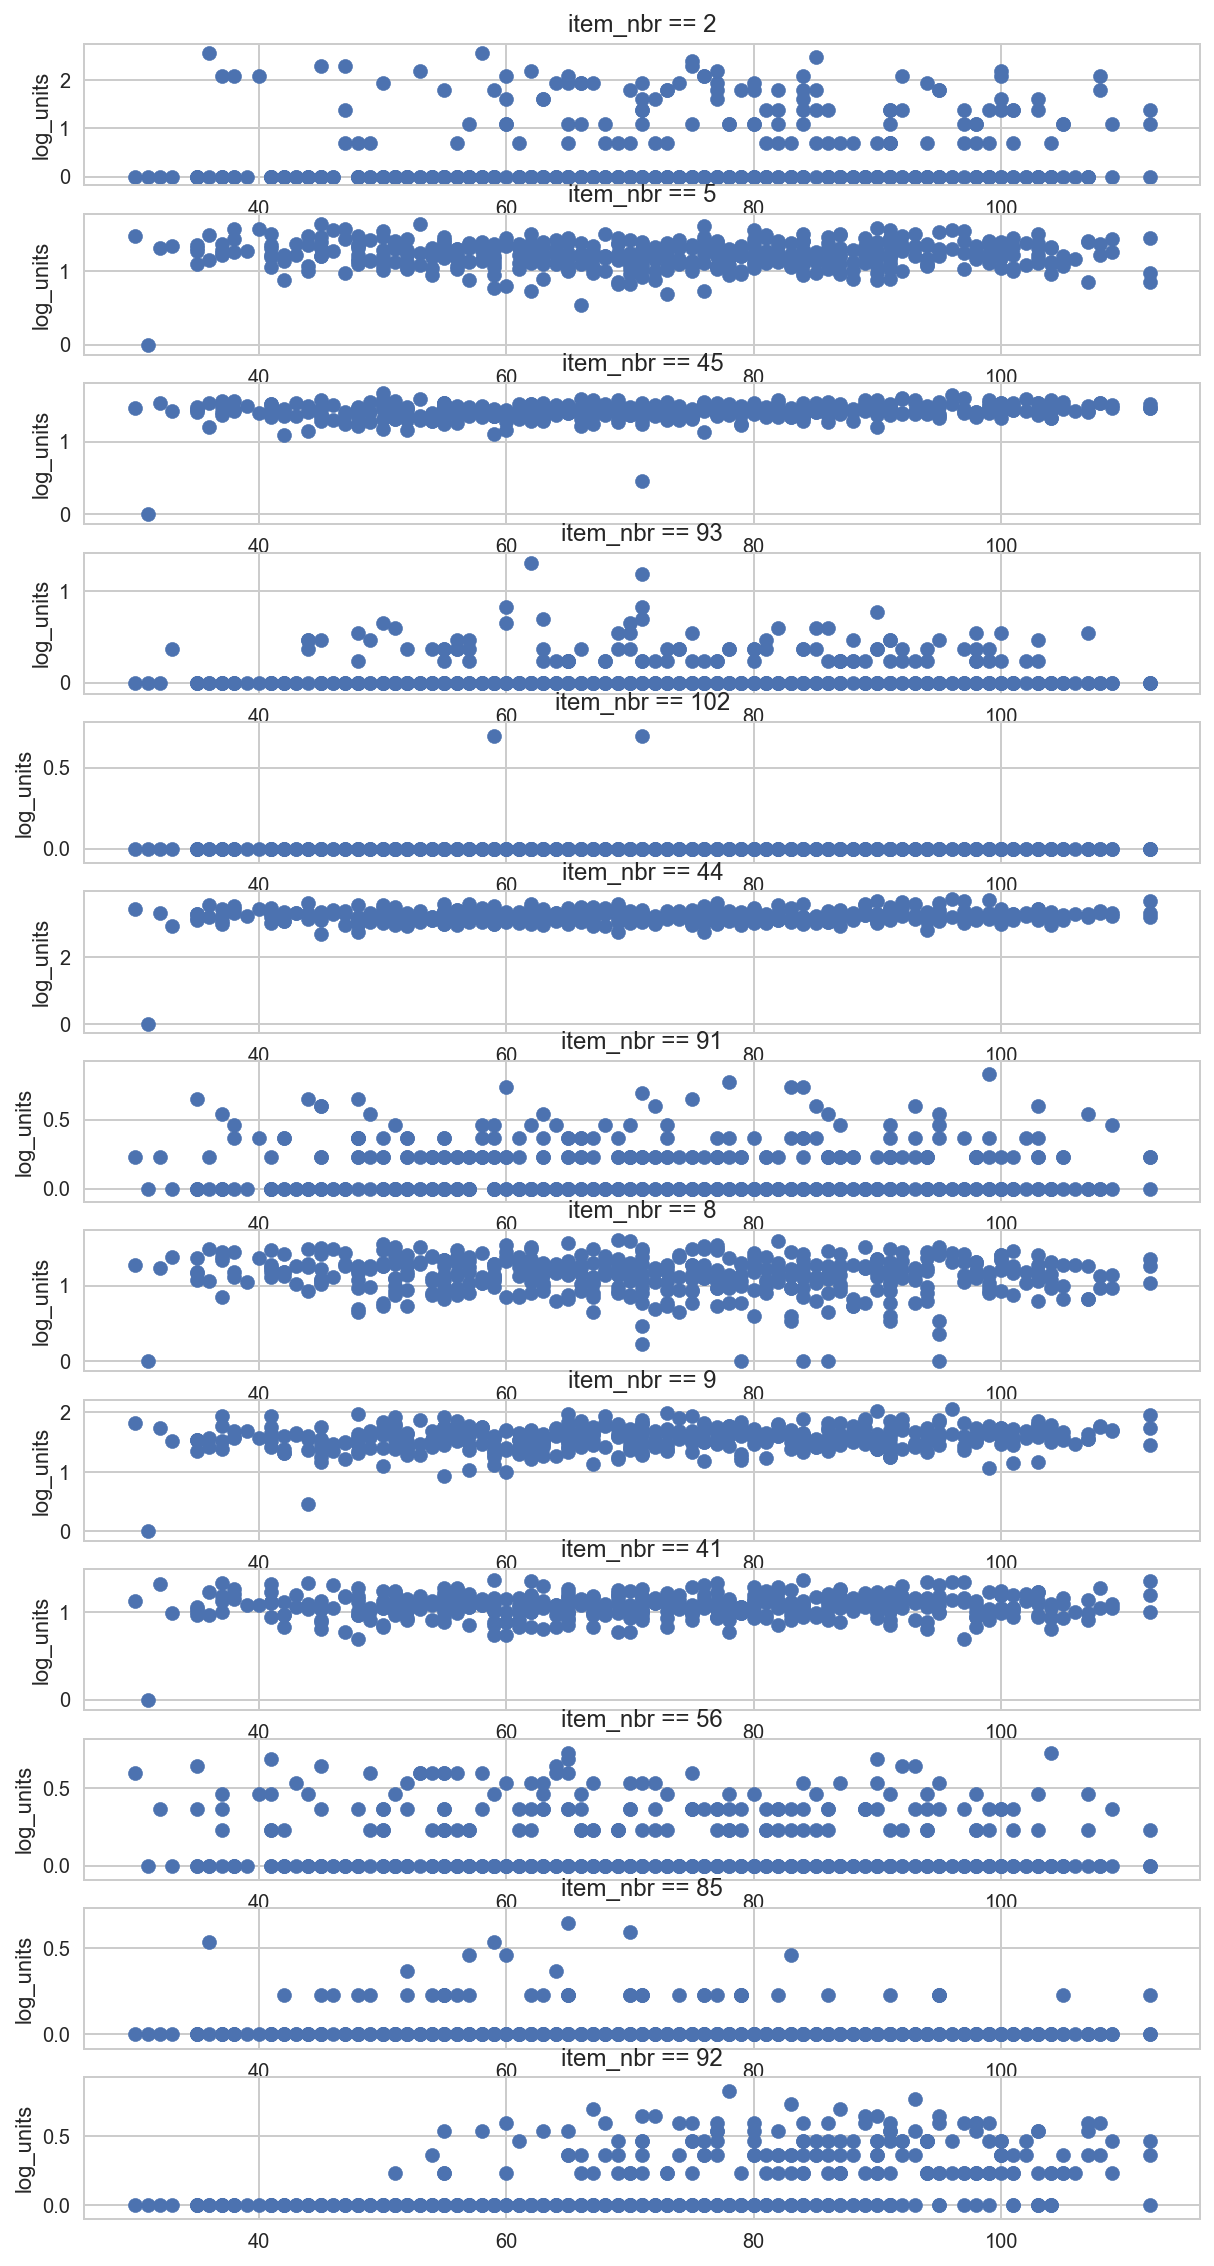

In [71]:
plt.figure(figsize = (10, 20))
plotcount = 1
for num in item_nbr_list_3 :
    plt.subplot(len(item_nbr_list_3), 1, plotcount)
    plt.scatter(x = merged_3['tmax'], y = merged_3[num]) # x에 들어가는 column을 바꿔가며 관계시각화 가능..pairplot은 왜 안되지 ㅅㅂ
    
    plt.ylabel('log_units')
#     plt.ylabel('log_units of item_nbr == {}'.format(num))

    plt.title('item_nbr == {}'.format(num))
        
    plotcount +=1

### station_nbr == 4
- store_nbr == 8

In [75]:
set_tmax(weather_train_4)
set_tmin(weather_train_4)
set_tavg(weather_train_4)
set_heat_cool(weather_train_4)

merged_4 = merge_weather_train(weather_train_4, train_new_8)
item_nbr_list_4 = get_item_nbr(merged_4)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


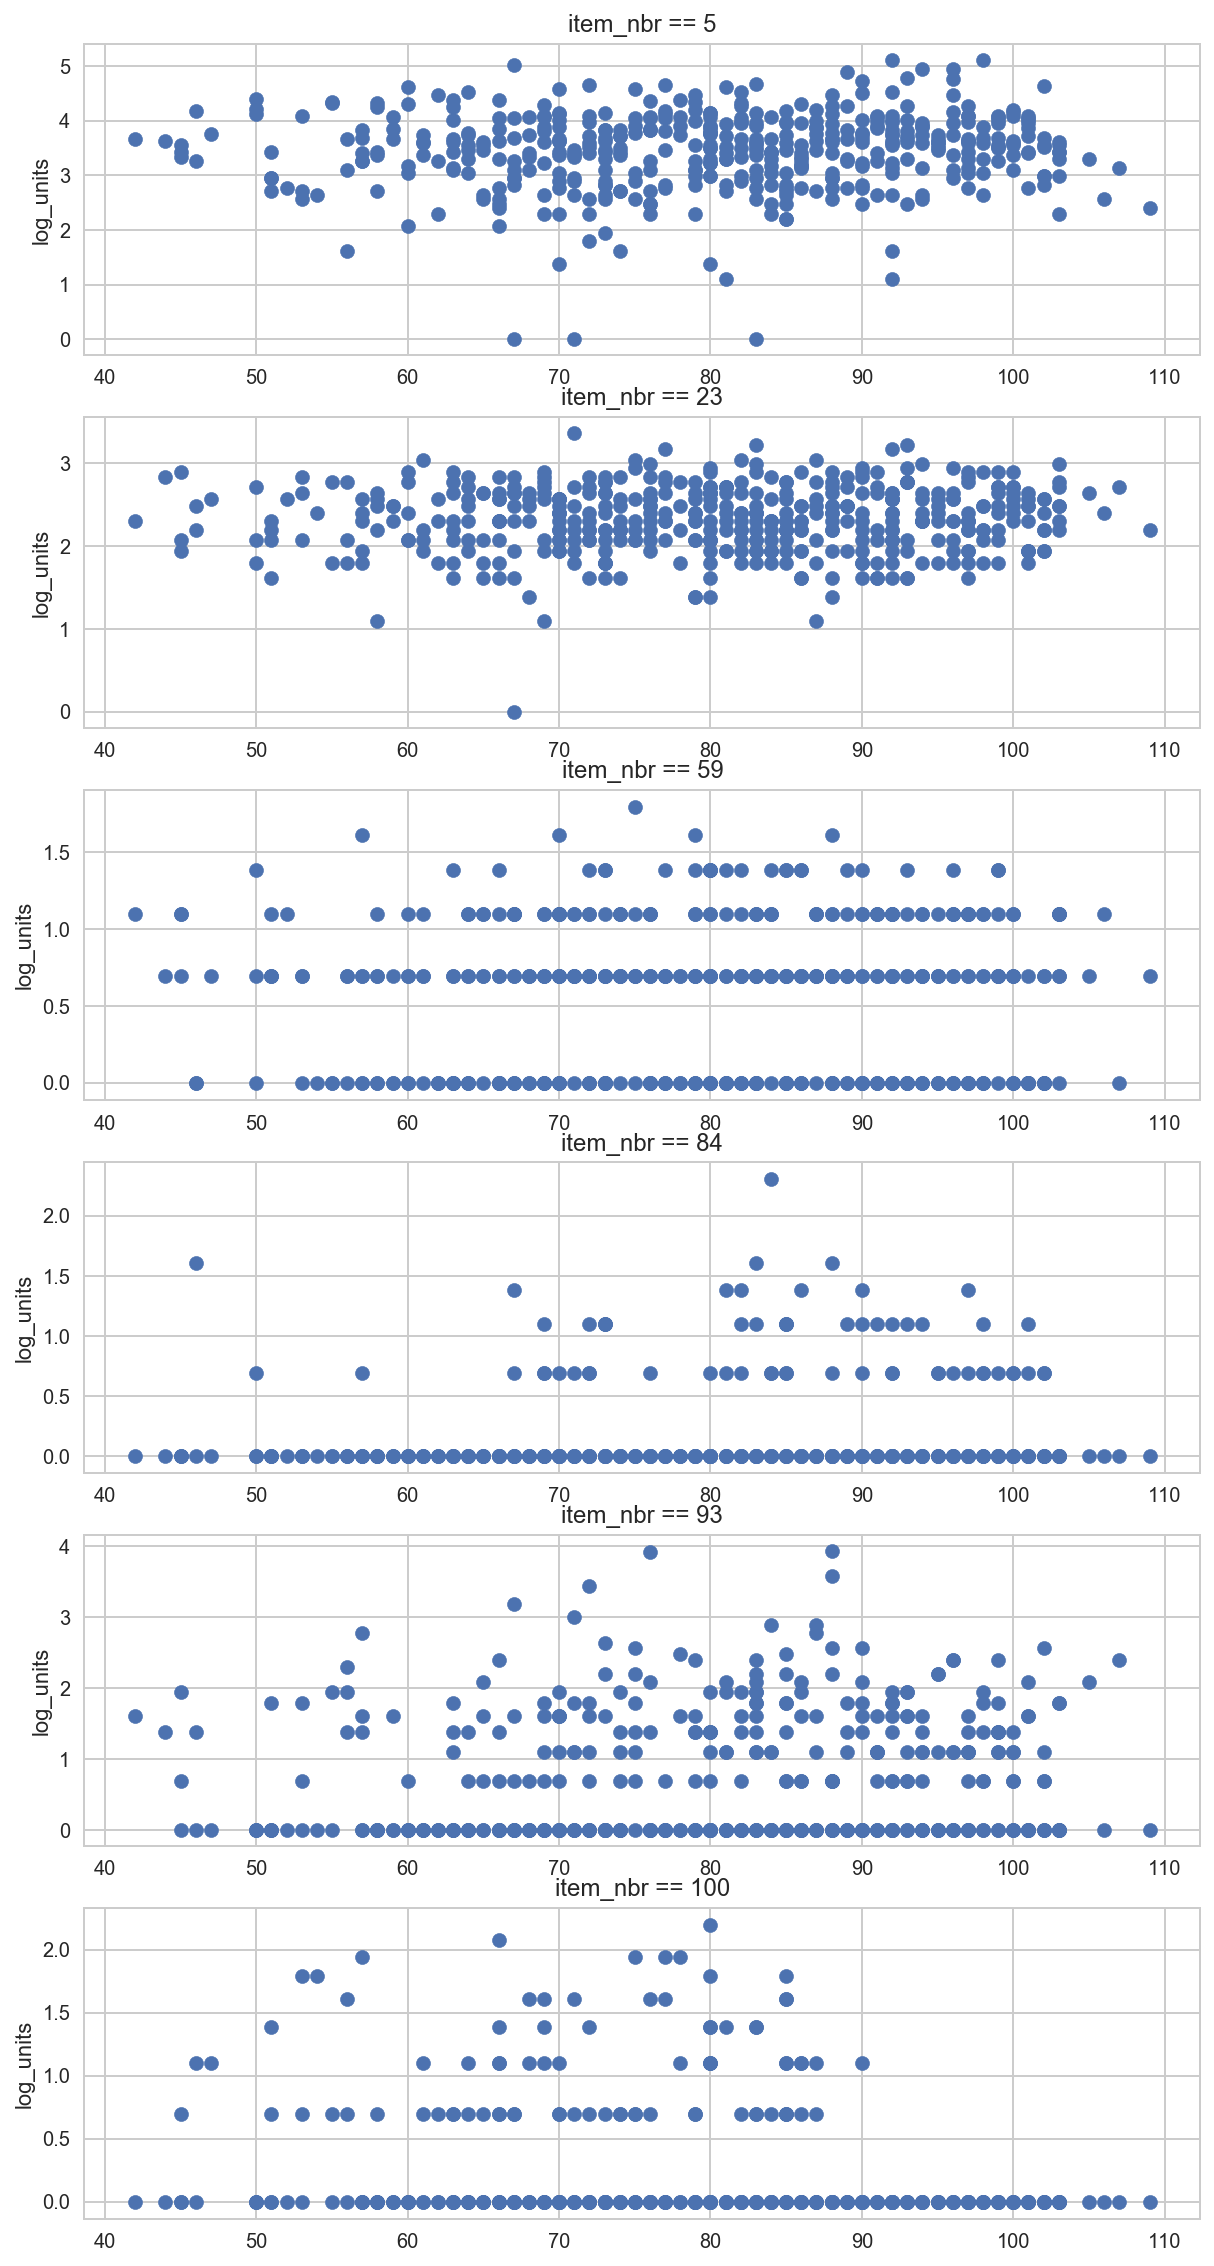

In [90]:
plt.figure(figsize = (10, 20))
plotcount = 1
for num in item_nbr_list_4 :
    plt.subplot(len(item_nbr_list_4), 1, plotcount)
    plt.scatter(x = merged_4['tmax'], y = merged_4[num]) # x에 들어가는 column을 바꿔가며 관계시각화 가능..pairplot은 왜 안되지 ㅅㅂ
    
    plt.ylabel('log_units')
#     plt.ylabel('log_units of item_nbr == {}'.format(num))

    plt.title('item_nbr == {}'.format(num))
        
    plotcount +=1

### station_nbr == 5
- store_nbr == 35

In [ ]:
# 여긴 좀 고민할 필요가 있음..

### station_nbr == 6
- store_nbr == 7, 13

In [74]:
result = pd.concat([train_new_7, train_new_13])

set_tmax(weather_train_6)
set_tmin(weather_train_6)
set_tavg(weather_train_6)
set_heat_cool(weather_train_6)

merged_6 = merge_weather_train(weather_train_6, result)
item_nbr_list_6 = get_item_nbr(merged_6)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


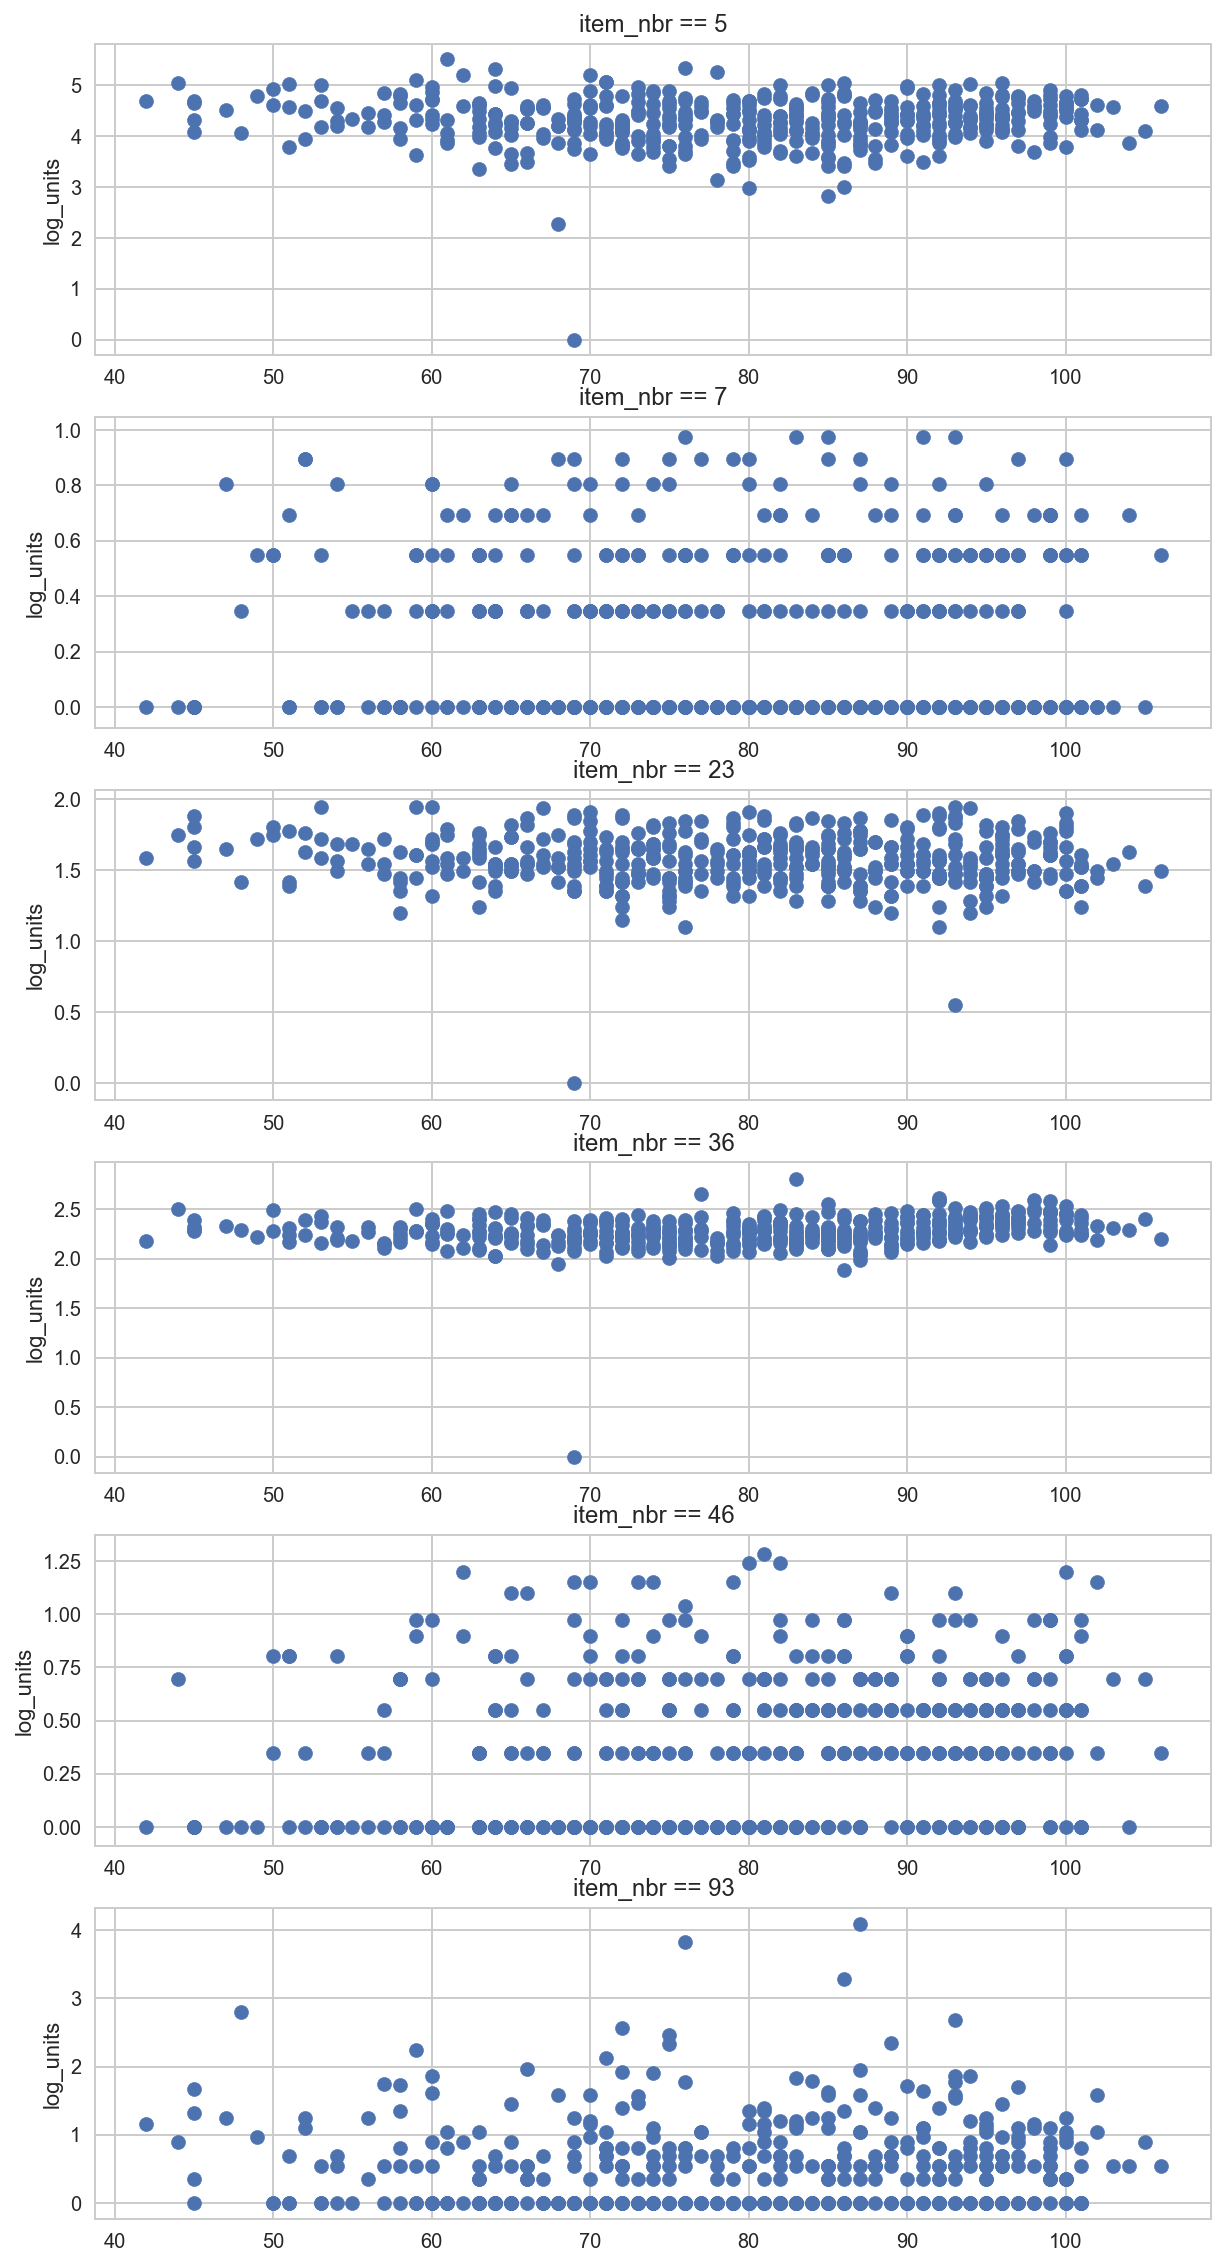

In [91]:
plt.figure(figsize = (10, 20))
plotcount = 1
for num in item_nbr_list_6 :
    plt.subplot(len(item_nbr_list_6), 1, plotcount)
    plt.scatter(x = merged_6['tmax'], y = merged_6[num]) # x에 들어가는 column을 바꿔가며 관계시각화 가능..pairplot은 왜 안되지 ㅅㅂ
    
    plt.ylabel('log_units')
#     plt.ylabel('log_units of item_nbr == {}'.format(num))

    plt.title('item_nbr == {}'.format(num))
        
    plotcount +=1

### station_nbr == 7
- store_nbr == 3, 20, 28

In [76]:
result = pd.concat([train_new_3, train_new_20, train_new_28])

set_tmax(weather_train_7)
set_tmin(weather_train_7)
set_tavg(weather_train_7)
set_heat_cool(weather_train_7)

merged_7 = merge_weather_train(weather_train_7, result)
item_nbr_list_7 = get_item_nbr(merged_7)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


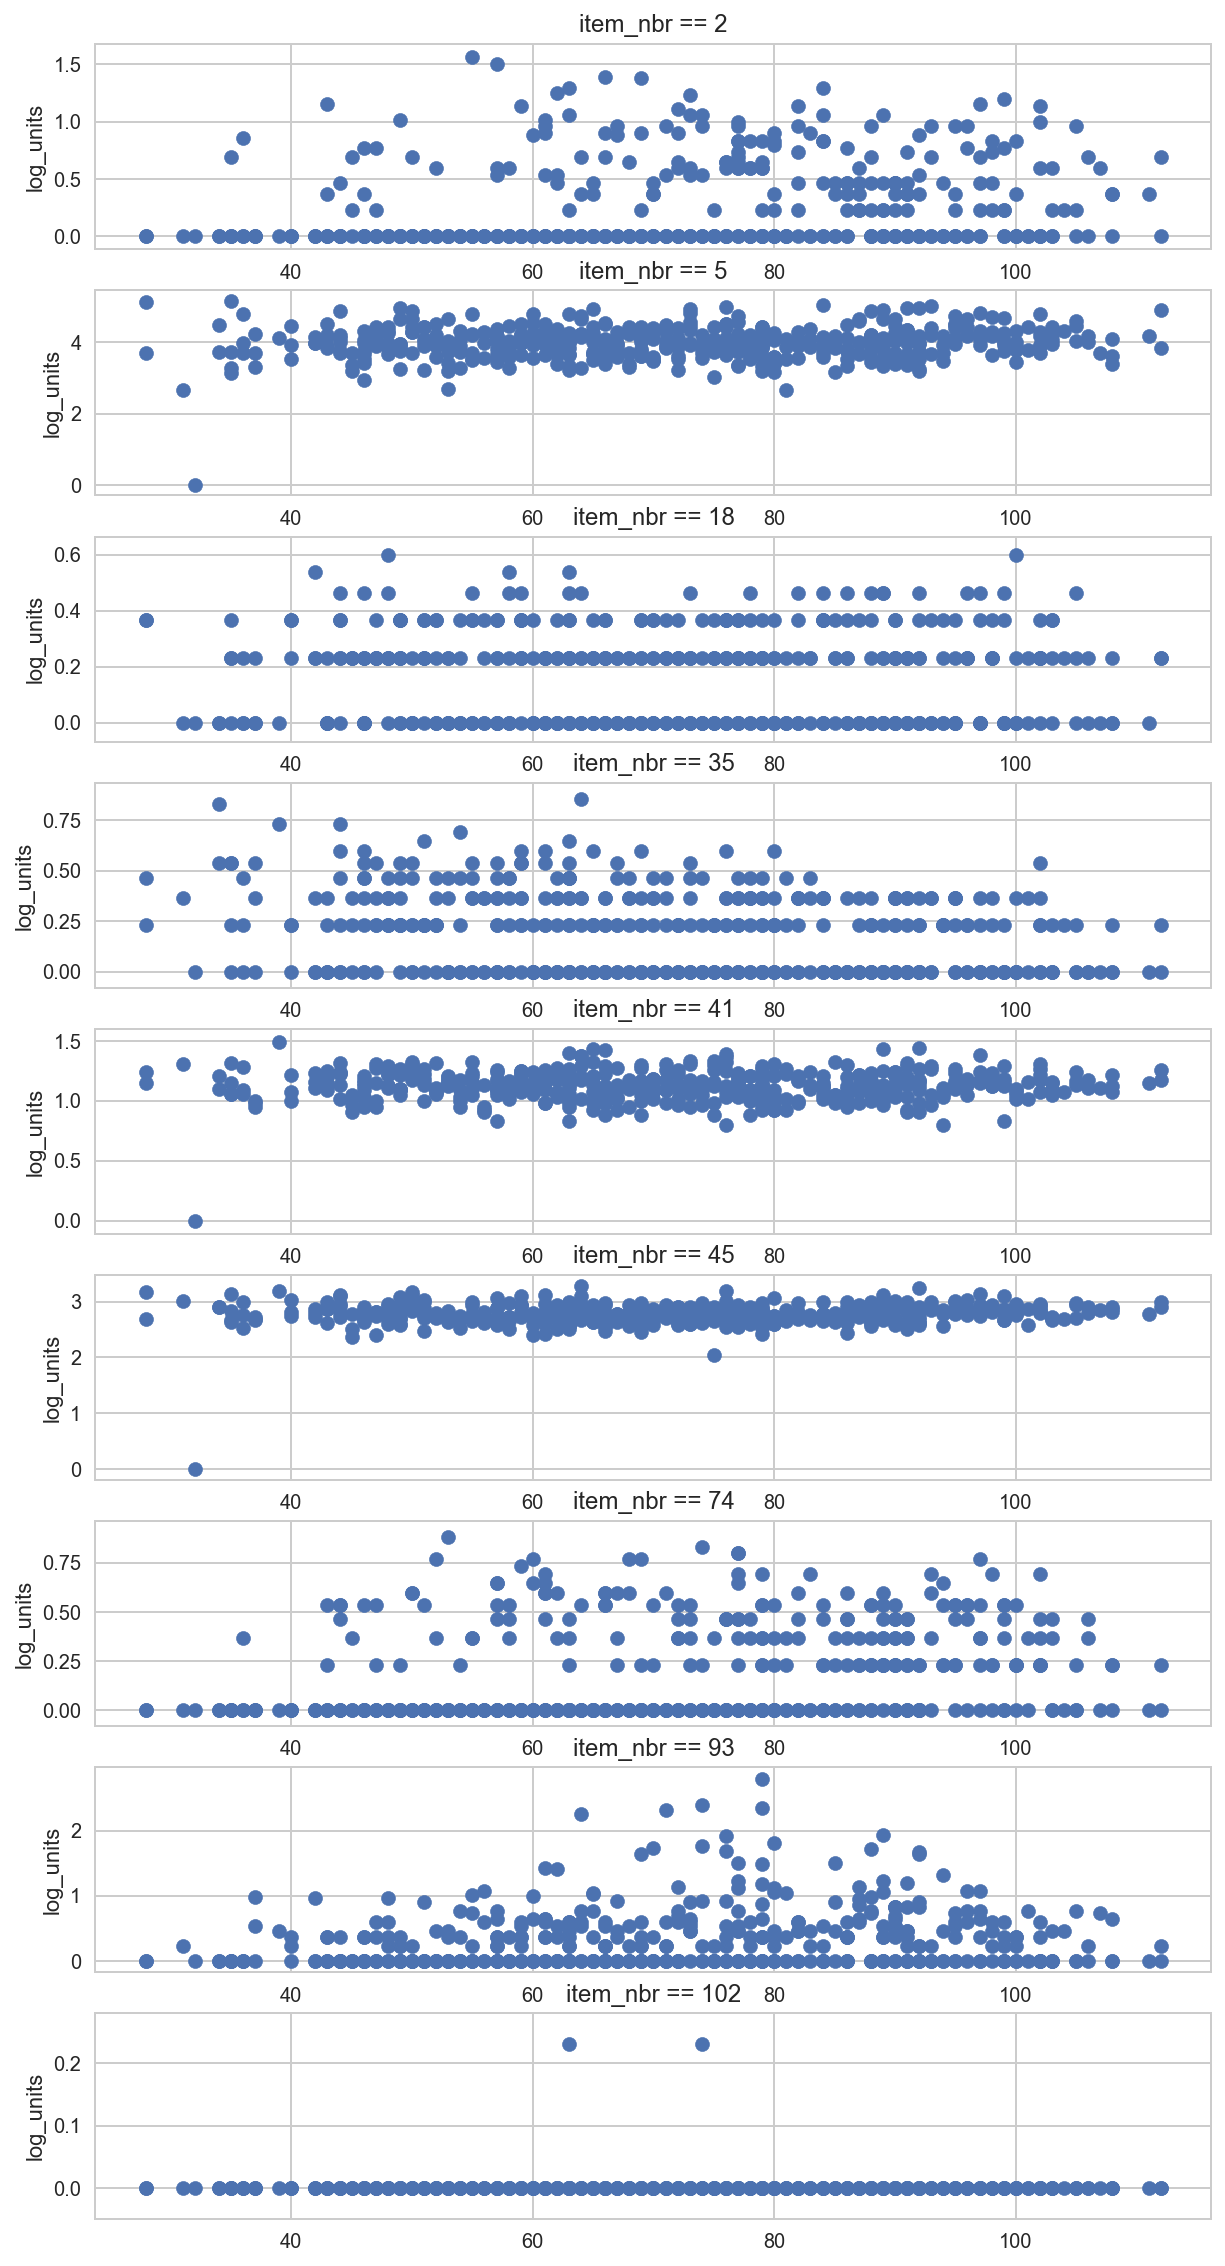

In [92]:
plt.figure(figsize = (10, 20))
plotcount = 1
for num in item_nbr_list_7 :
    plt.subplot(len(item_nbr_list_7), 1, plotcount)
    plt.scatter(x = merged_7['tmax'], y = merged_7[num]) # x에 들어가는 column을 바꿔가며 관계시각화 가능..pairplot은 왜 안되지 ㅅㅂ
    
    plt.ylabel('log_units')
#     plt.ylabel('log_units of item_nbr == {}'.format(num))

    plt.title('item_nbr == {}'.format(num))
        
    plotcount +=1

### station_nbr == 8
- store_nbr == 39

In [77]:
set_tmax(weather_train_8)
set_tmin(weather_train_8)
set_tavg(weather_train_8)
set_heat_cool(weather_train_8)

merged_8 = merge_weather_train(weather_train_8, train_new_39)
item_nbr_list_8 = get_item_nbr(merged_8)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


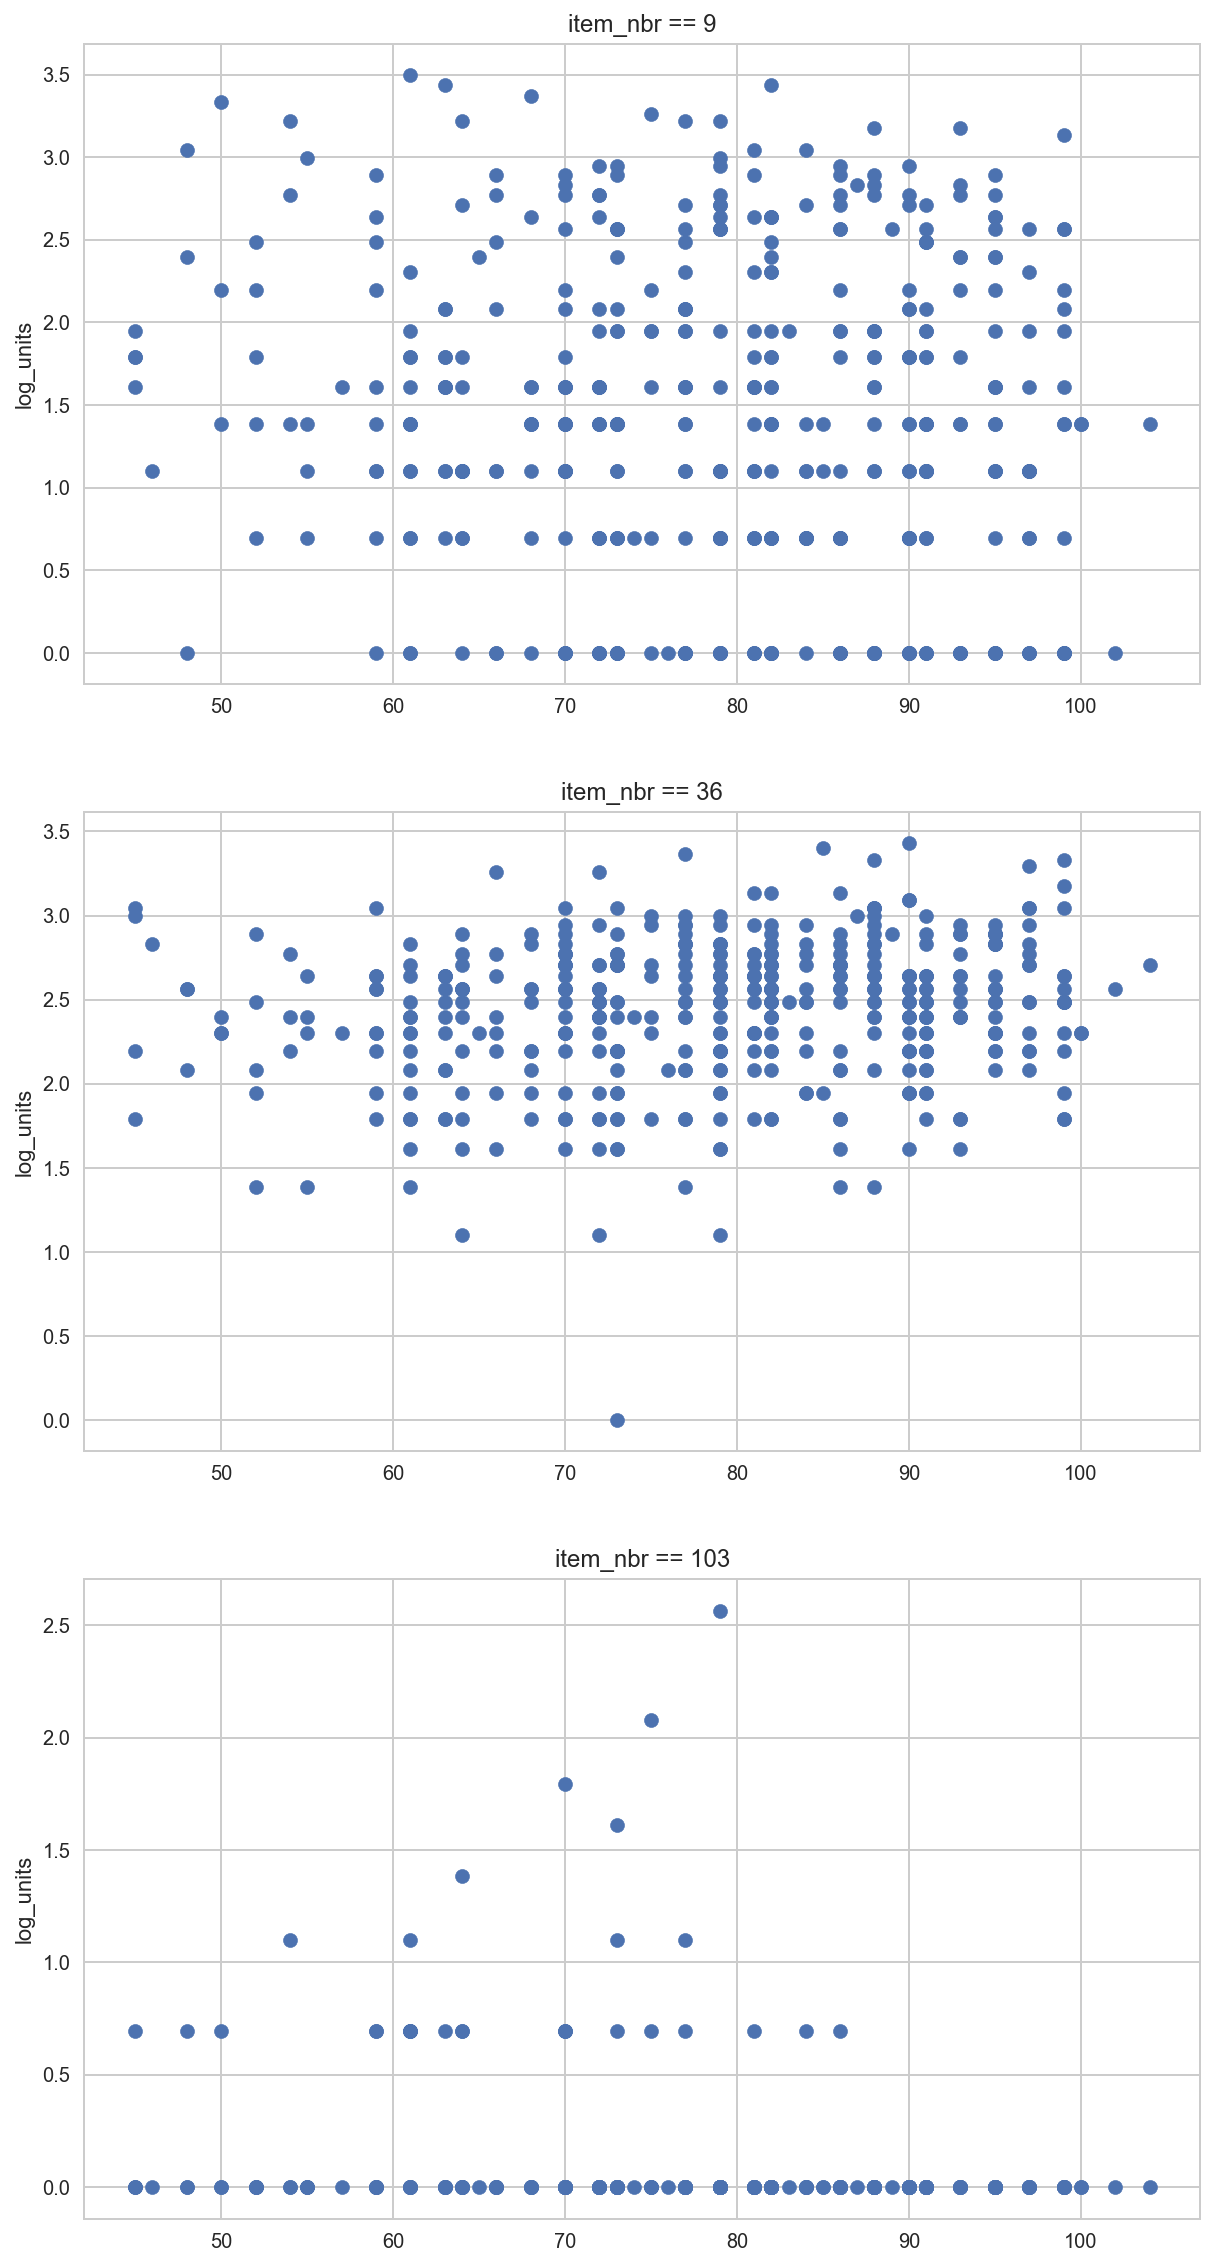

In [93]:
plt.figure(figsize = (10, 20))
plotcount = 1
for num in item_nbr_list_8 :
    plt.subplot(len(item_nbr_list_8), 1, plotcount)
    plt.scatter(x = merged_8['tmax'], y = merged_8[num]) # x에 들어가는 column을 바꿔가며 관계시각화 가능..pairplot은 왜 안되지 ㅅㅂ
    
    plt.ylabel('log_units')
#     plt.ylabel('log_units of item_nbr == {}'.format(num))

    plt.title('item_nbr == {}'.format(num))
        
    plotcount +=1

### station_nbr == 9
- store_nbr == 4, 24

In [78]:
result = pd.concat([train_new_4, train_new_24])

set_tmax(weather_train_9)
set_tmin(weather_train_9)
set_tavg(weather_train_9)
set_heat_cool(weather_train_9)

merged_9 = merge_weather_train(weather_train_9, result)
item_nbr_list_9 = get_item_nbr(merged_9)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


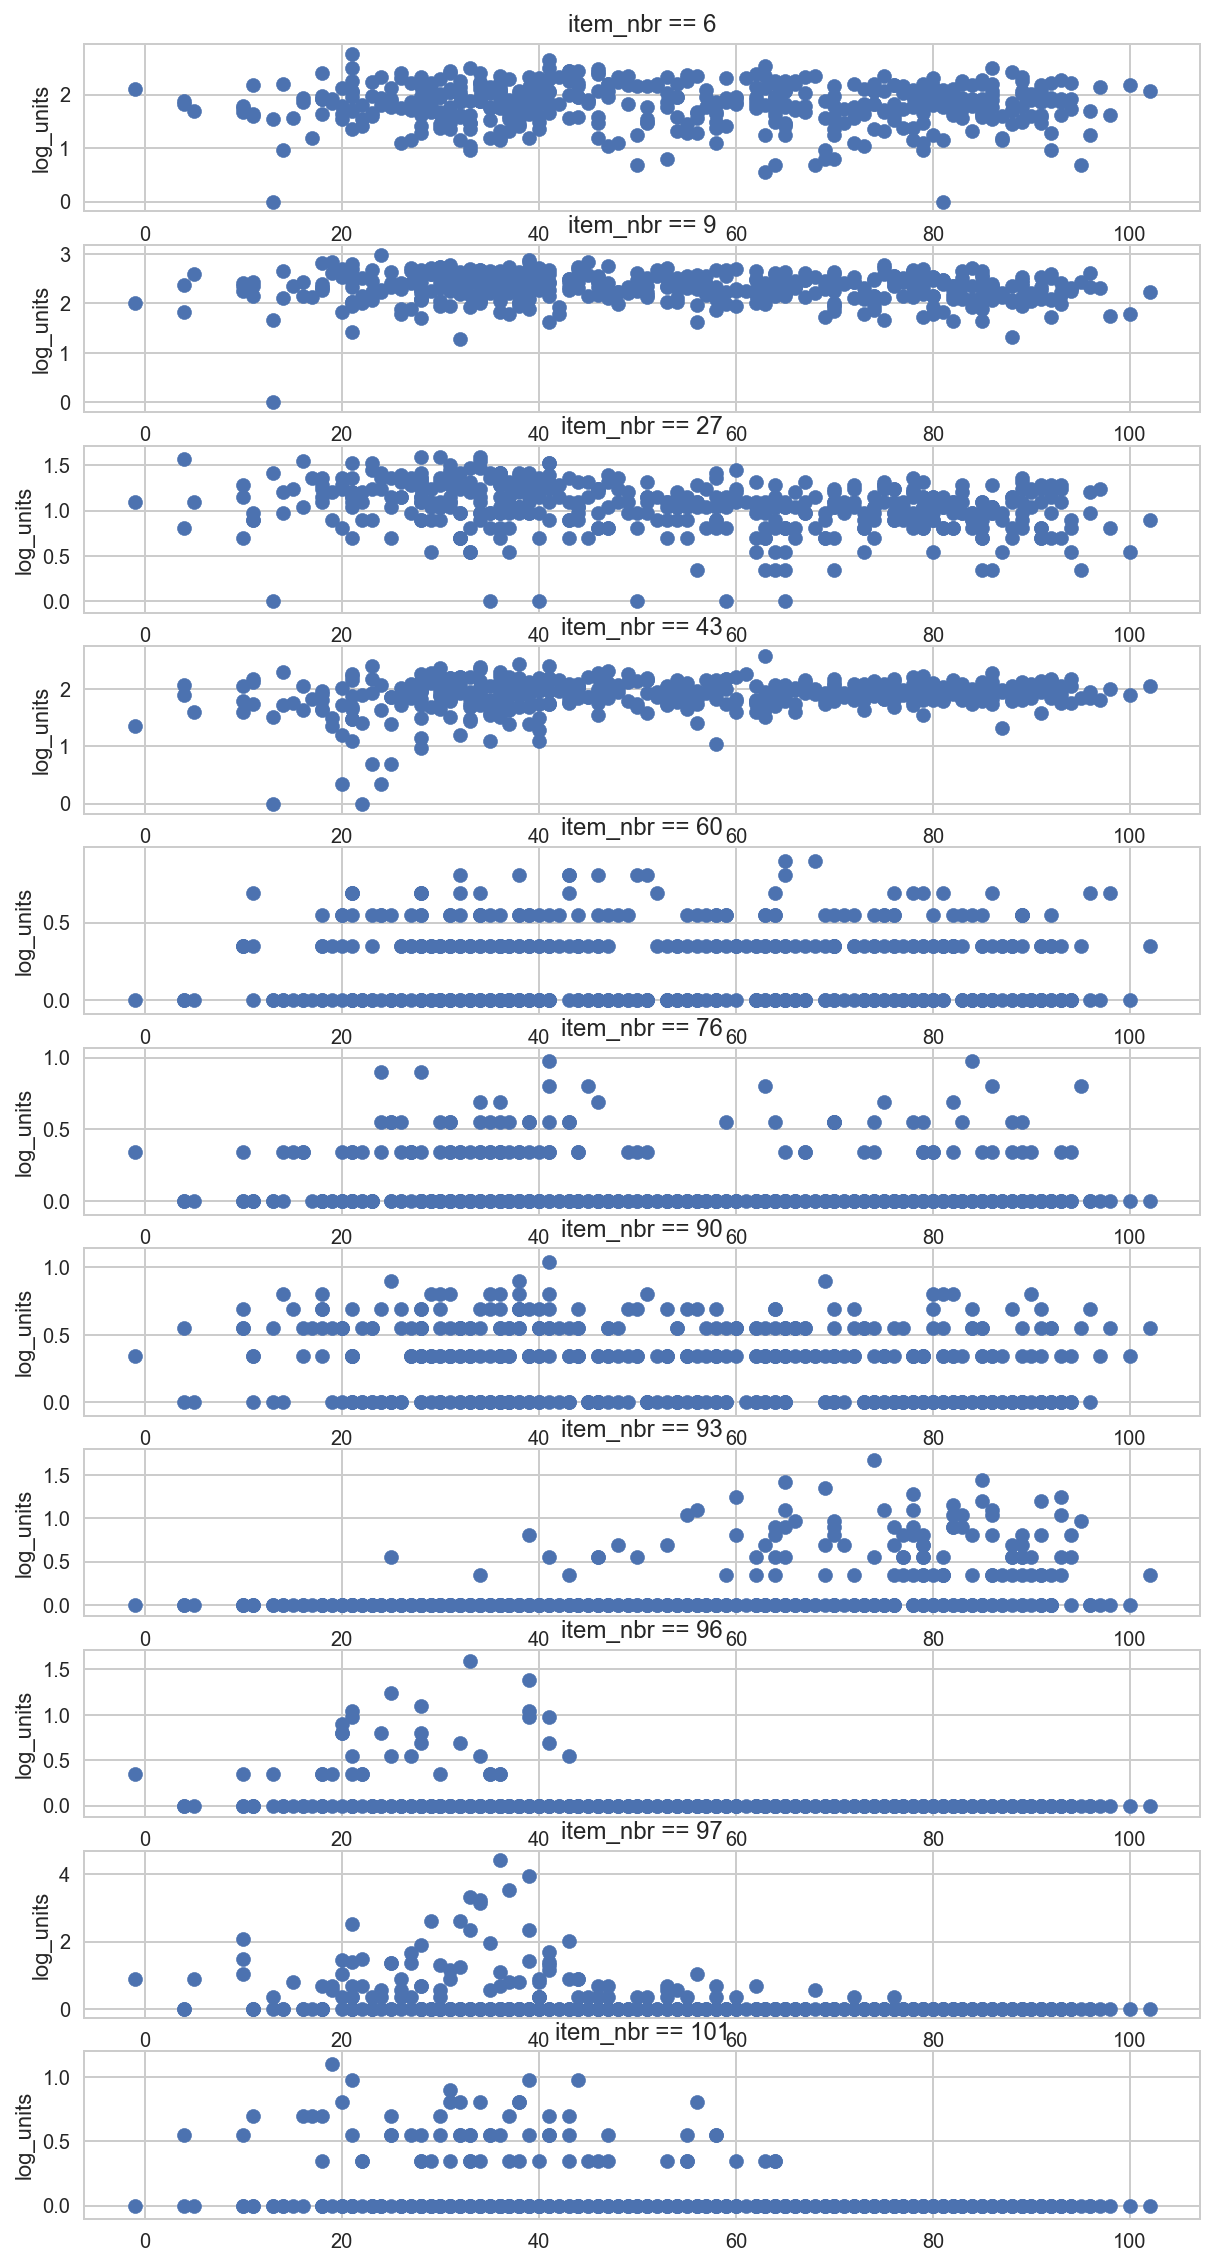

In [94]:
plt.figure(figsize = (10, 20))
plotcount = 1
for num in item_nbr_list_9 :
    plt.subplot(len(item_nbr_list_9), 1, plotcount)
    plt.scatter(x = merged_9['tmax'], y = merged_9[num]) # x에 들어가는 column을 바꿔가며 관계시각화 가능..pairplot은 왜 안되지 ㅅㅂ
    
    plt.ylabel('log_units')
#     plt.ylabel('log_units of item_nbr == {}'.format(num))

    plt.title('item_nbr == {}'.format(num))
        
    plotcount +=1

### station_nbr == 10
- store_nbr == 11, 22, 27

In [80]:
result = pd.concat([train_new_11, train_new_22, train_new_27])

set_tmax(weather_train_10)
set_tmin(weather_train_10)
set_tavg(weather_train_10)
set_heat_cool(weather_train_10)

merged_10 = merge_weather_train(weather_train_10, result)
item_nbr_list_10 = get_item_nbr(merged_10)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


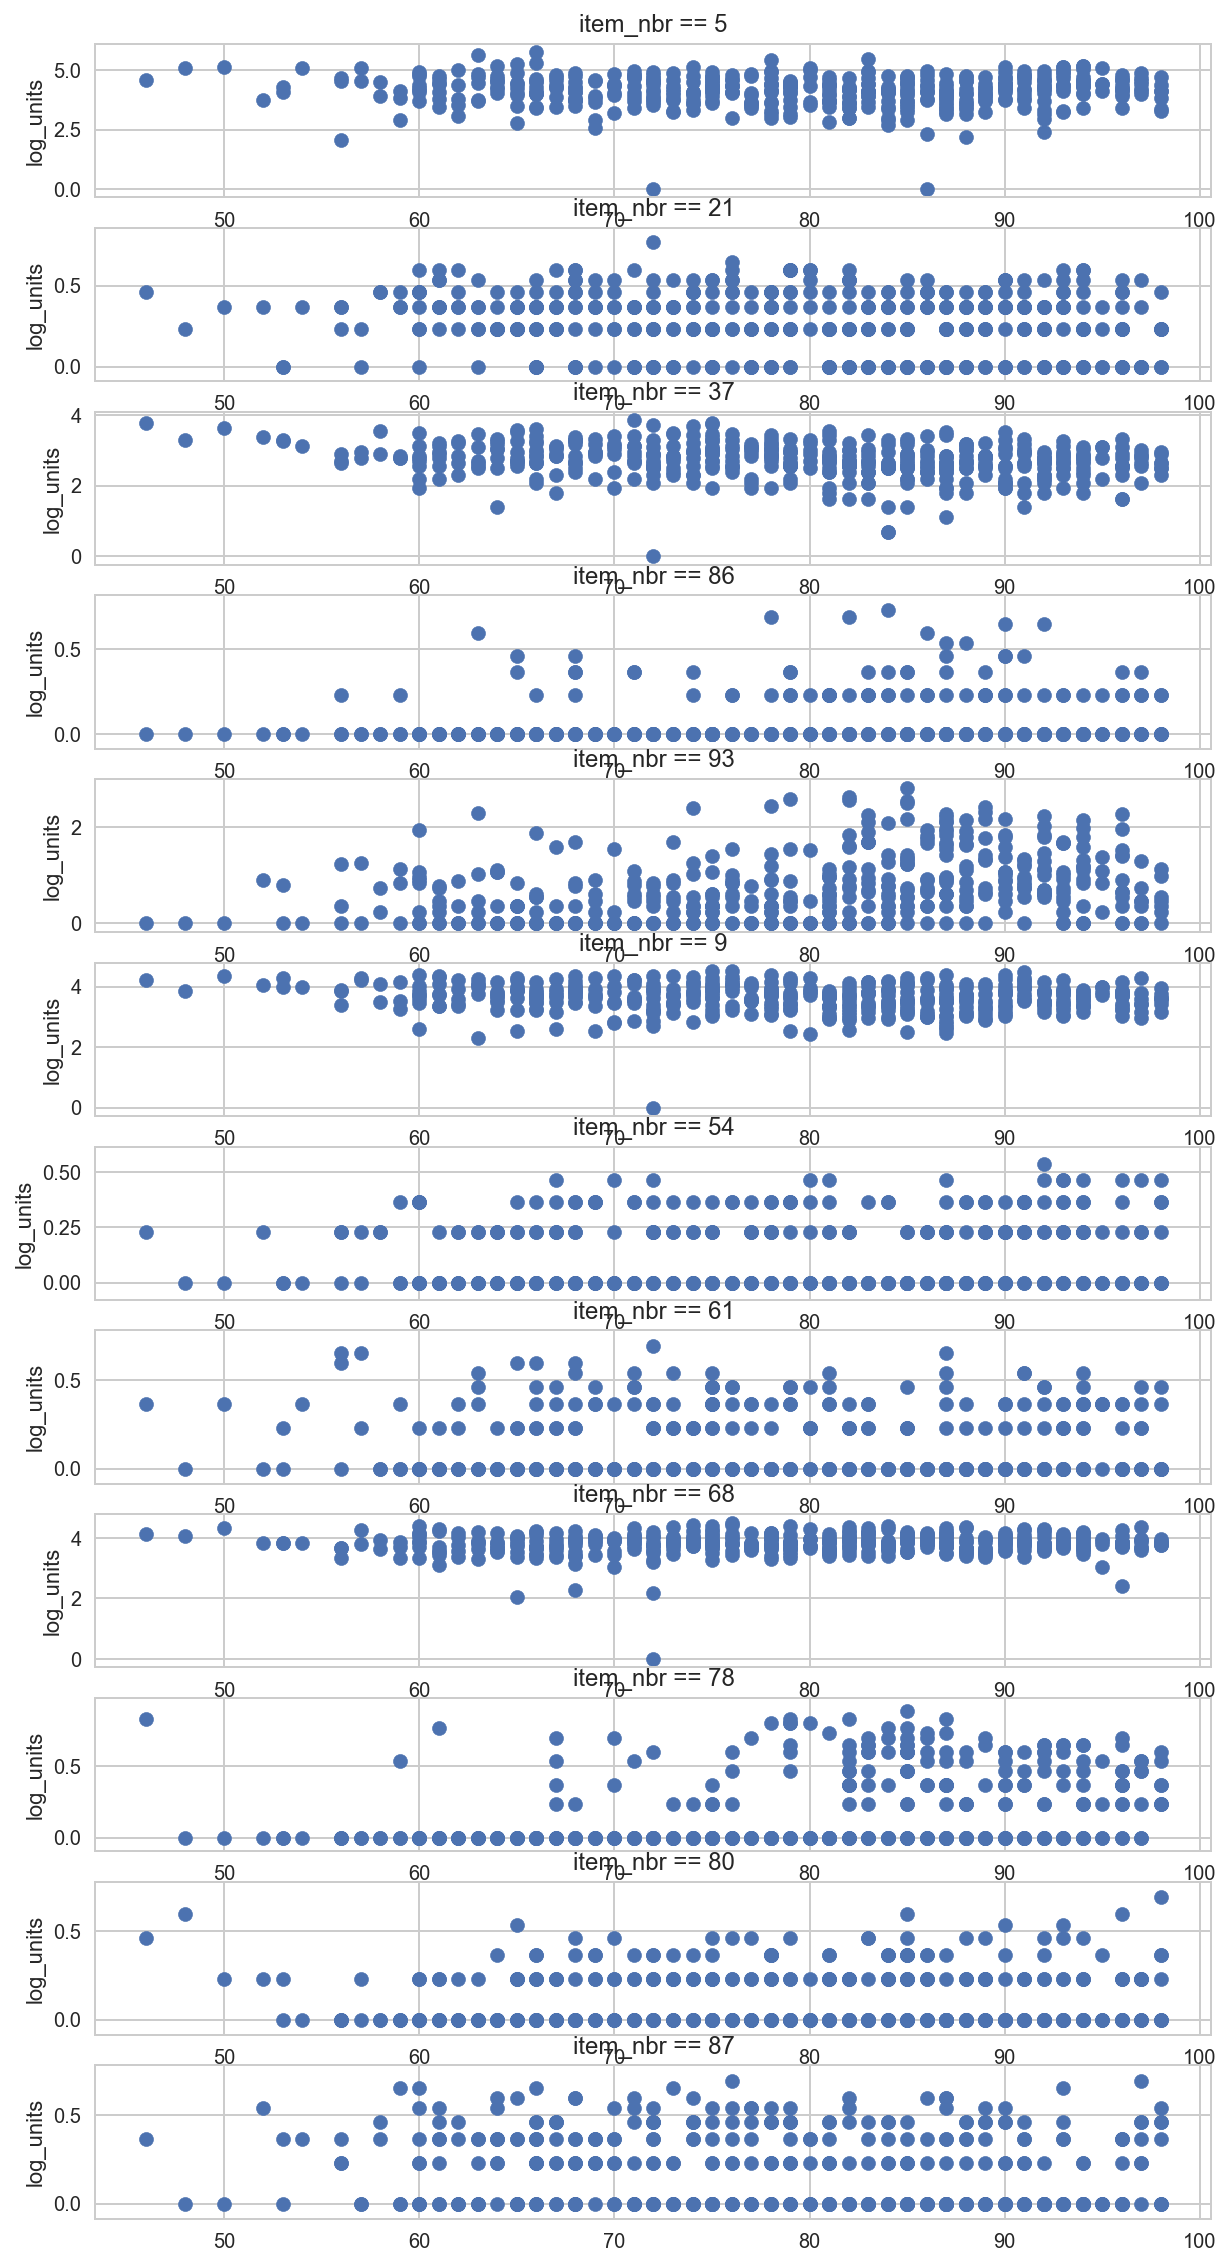

In [95]:
plt.figure(figsize = (10, 20))
plotcount = 1
for num in item_nbr_list_10 :
    plt.subplot(len(item_nbr_list_10), 1, plotcount)
    plt.scatter(x = merged_10['tmax'], y = merged_10[num]) # x에 들어가는 column을 바꿔가며 관계시각화 가능..pairplot은 왜 안되지 ㅅㅂ
    
    plt.ylabel('log_units')
#     plt.ylabel('log_units of item_nbr == {}'.format(num))

    plt.title('item_nbr == {}'.format(num))
        
    plotcount +=1

### station_nbr == 11
- store_nbr == 12, 43

In [81]:
result = pd.concat([train_new_12, train_new_43])

set_tmax(weather_train_11)
set_tmin(weather_train_11)
set_tavg(weather_train_11)
set_heat_cool(weather_train_11)

merged_11 = merge_weather_train(weather_train_11, result)
item_nbr_list_11 = get_item_nbr(merged_11)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


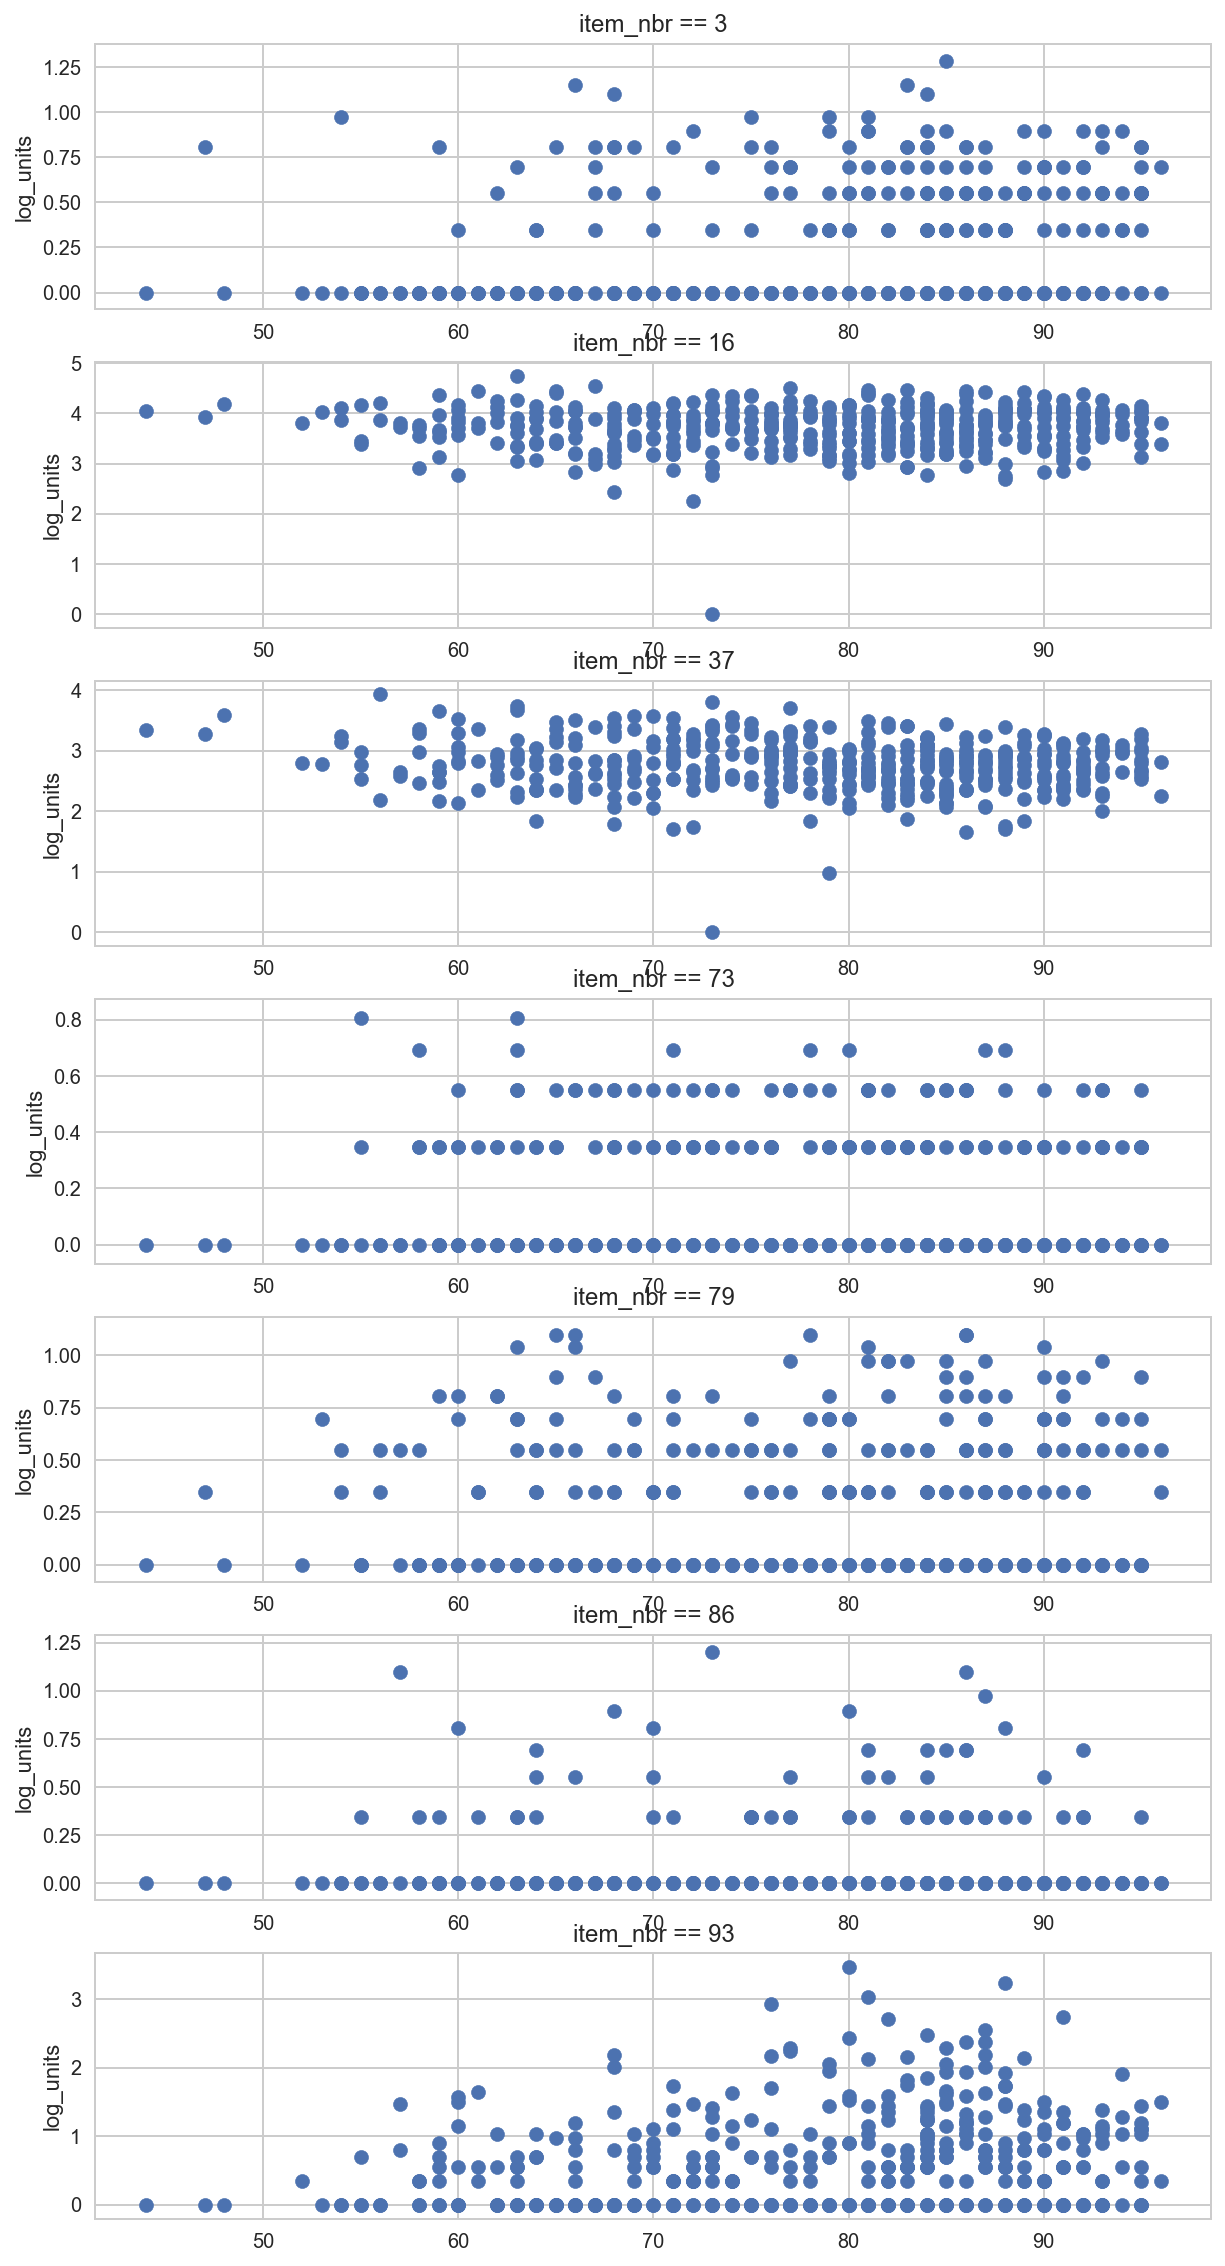

In [96]:
plt.figure(figsize = (10, 20))
plotcount = 1
for num in item_nbr_list_11 :
    plt.subplot(len(item_nbr_list_11), 1, plotcount)
    plt.scatter(x = merged_11['tmax'], y = merged_11[num]) # x에 들어가는 column을 바꿔가며 관계시각화 가능..pairplot은 왜 안되지 ㅅㅂ
    
    plt.ylabel('log_units')
#     plt.ylabel('log_units of item_nbr == {}'.format(num))

    plt.title('item_nbr == {}'.format(num))
        
    plotcount +=1

### station_nbr == 12
- store_nbr == 5, 10, 41, 44

In [82]:
result = pd.concat([train_new_5, train_new_10, train_new_41, train_new_44])

set_tmax(weather_train_12)
set_tmin(weather_train_12)
set_tavg(weather_train_12)
set_heat_cool(weather_train_12)

merged_12 = merge_weather_train(weather_train_12, result)
item_nbr_list_12 = get_item_nbr(merged_12)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


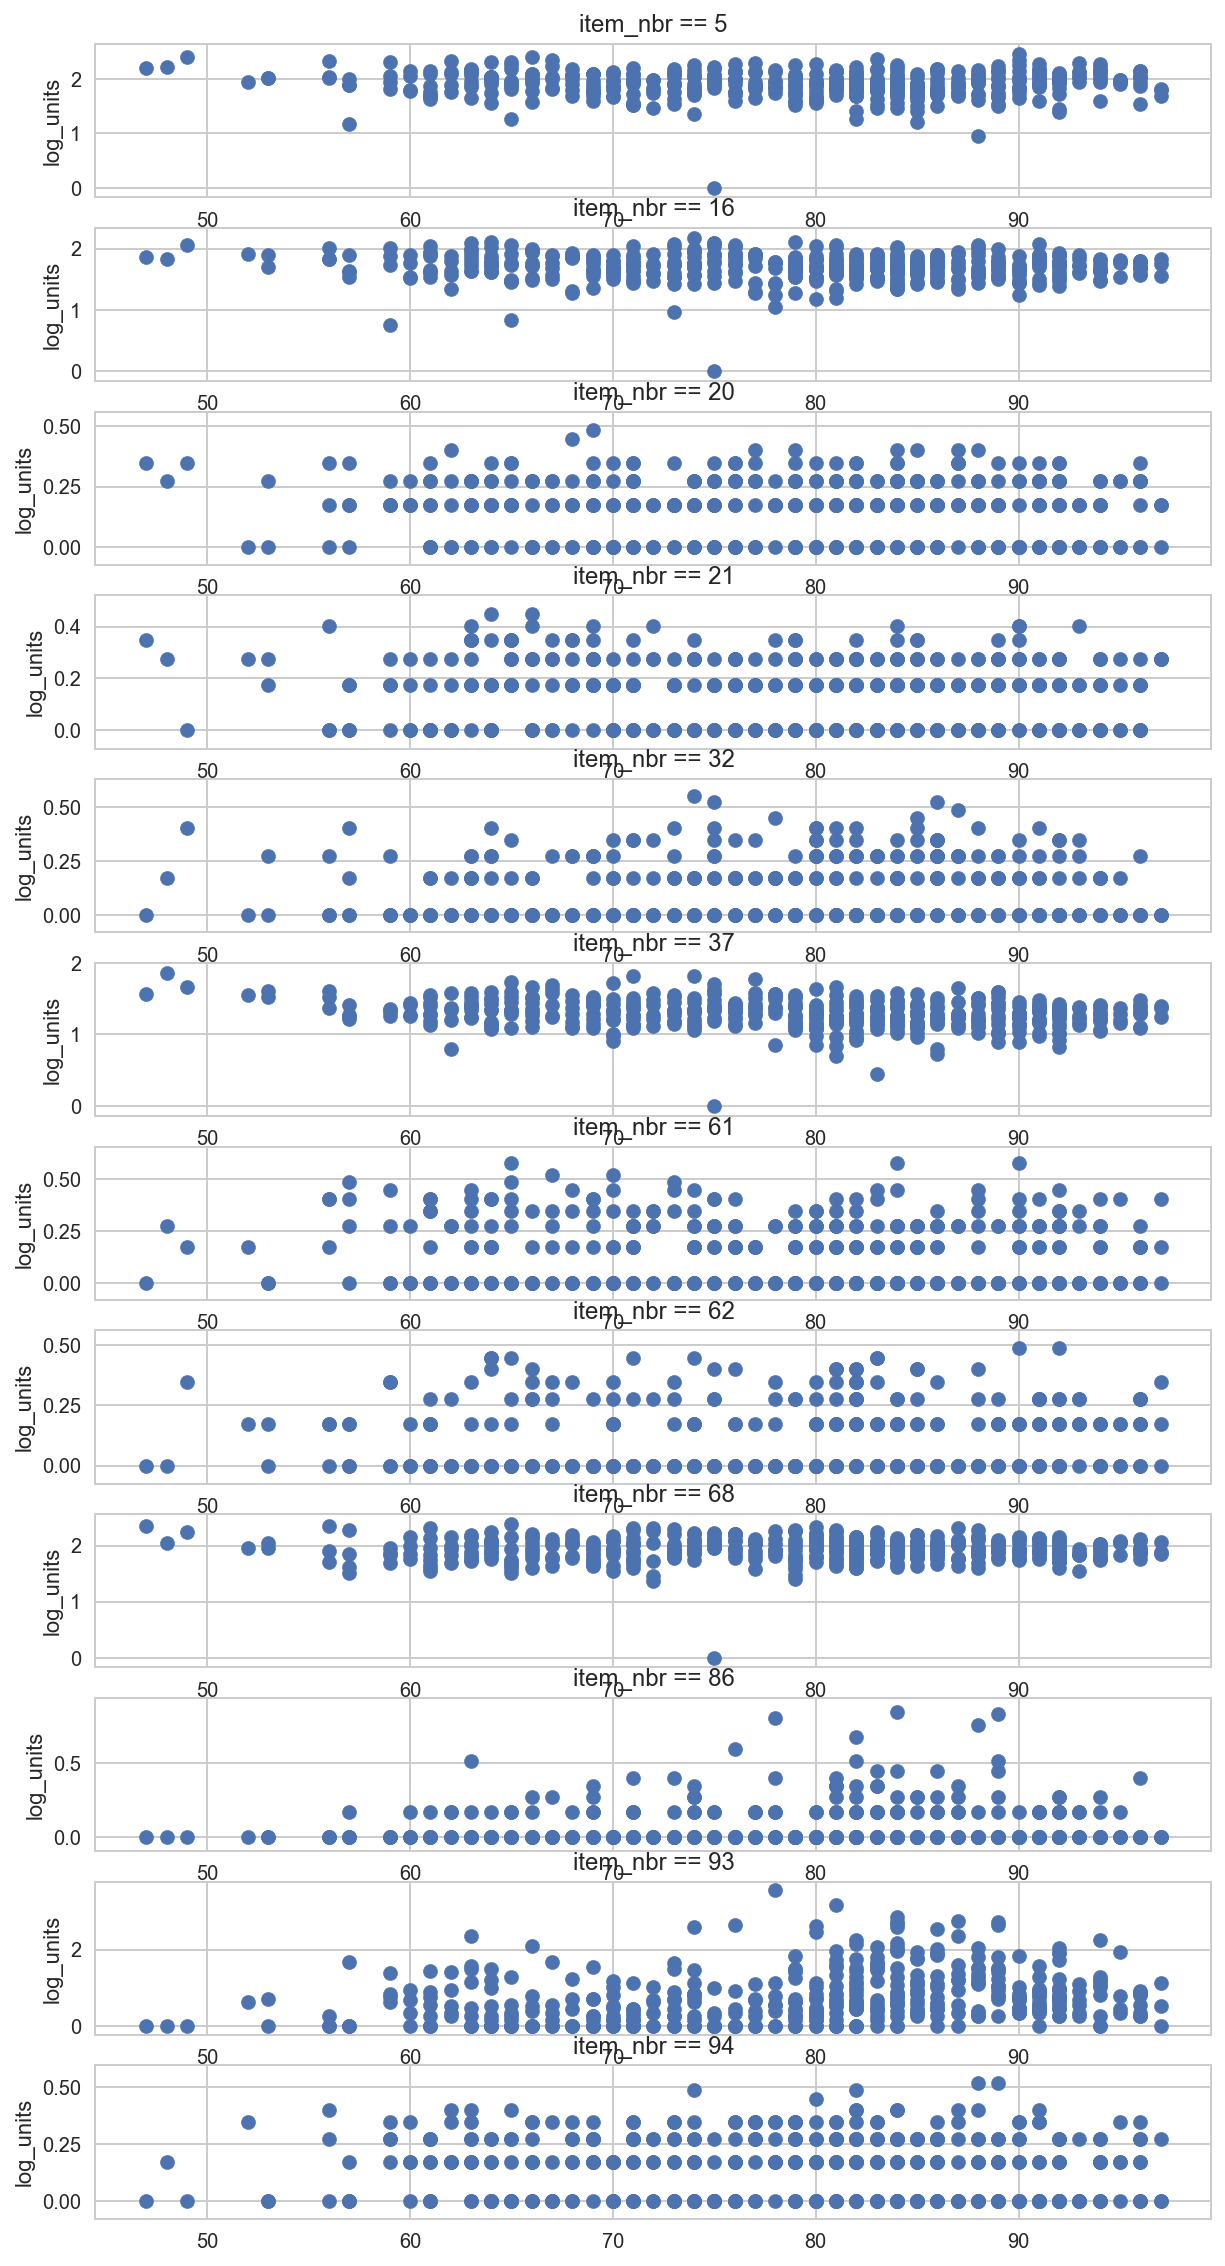

In [97]:
plt.figure(figsize = (10, 20))
plotcount = 1
for num in item_nbr_list_12 :
    plt.subplot(len(item_nbr_list_12), 1, plotcount)
    plt.scatter(x = merged_12['tmax'], y = merged_12[num]) # x에 들어가는 column을 바꿔가며 관계시각화 가능..pairplot은 왜 안되지 ㅅㅂ
    
    plt.ylabel('log_units')
#     plt.ylabel('log_units of item_nbr == {}'.format(num))

    plt.title('item_nbr == {}'.format(num))
        
    plotcount +=1

### station_nbr == 13
- store_nbr == 15, 25, 32, 37, 40

In [83]:
result = pd.concat([train_new_15, train_new_25, train_new_32, train_new_37, train_new_40])

set_tmax(weather_train_13)
set_tmin(weather_train_13)
set_tavg(weather_train_13)
set_heat_cool(weather_train_13)

merged_13 = merge_weather_train(weather_train_13, result)
item_nbr_list_13 = get_item_nbr(merged_13)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


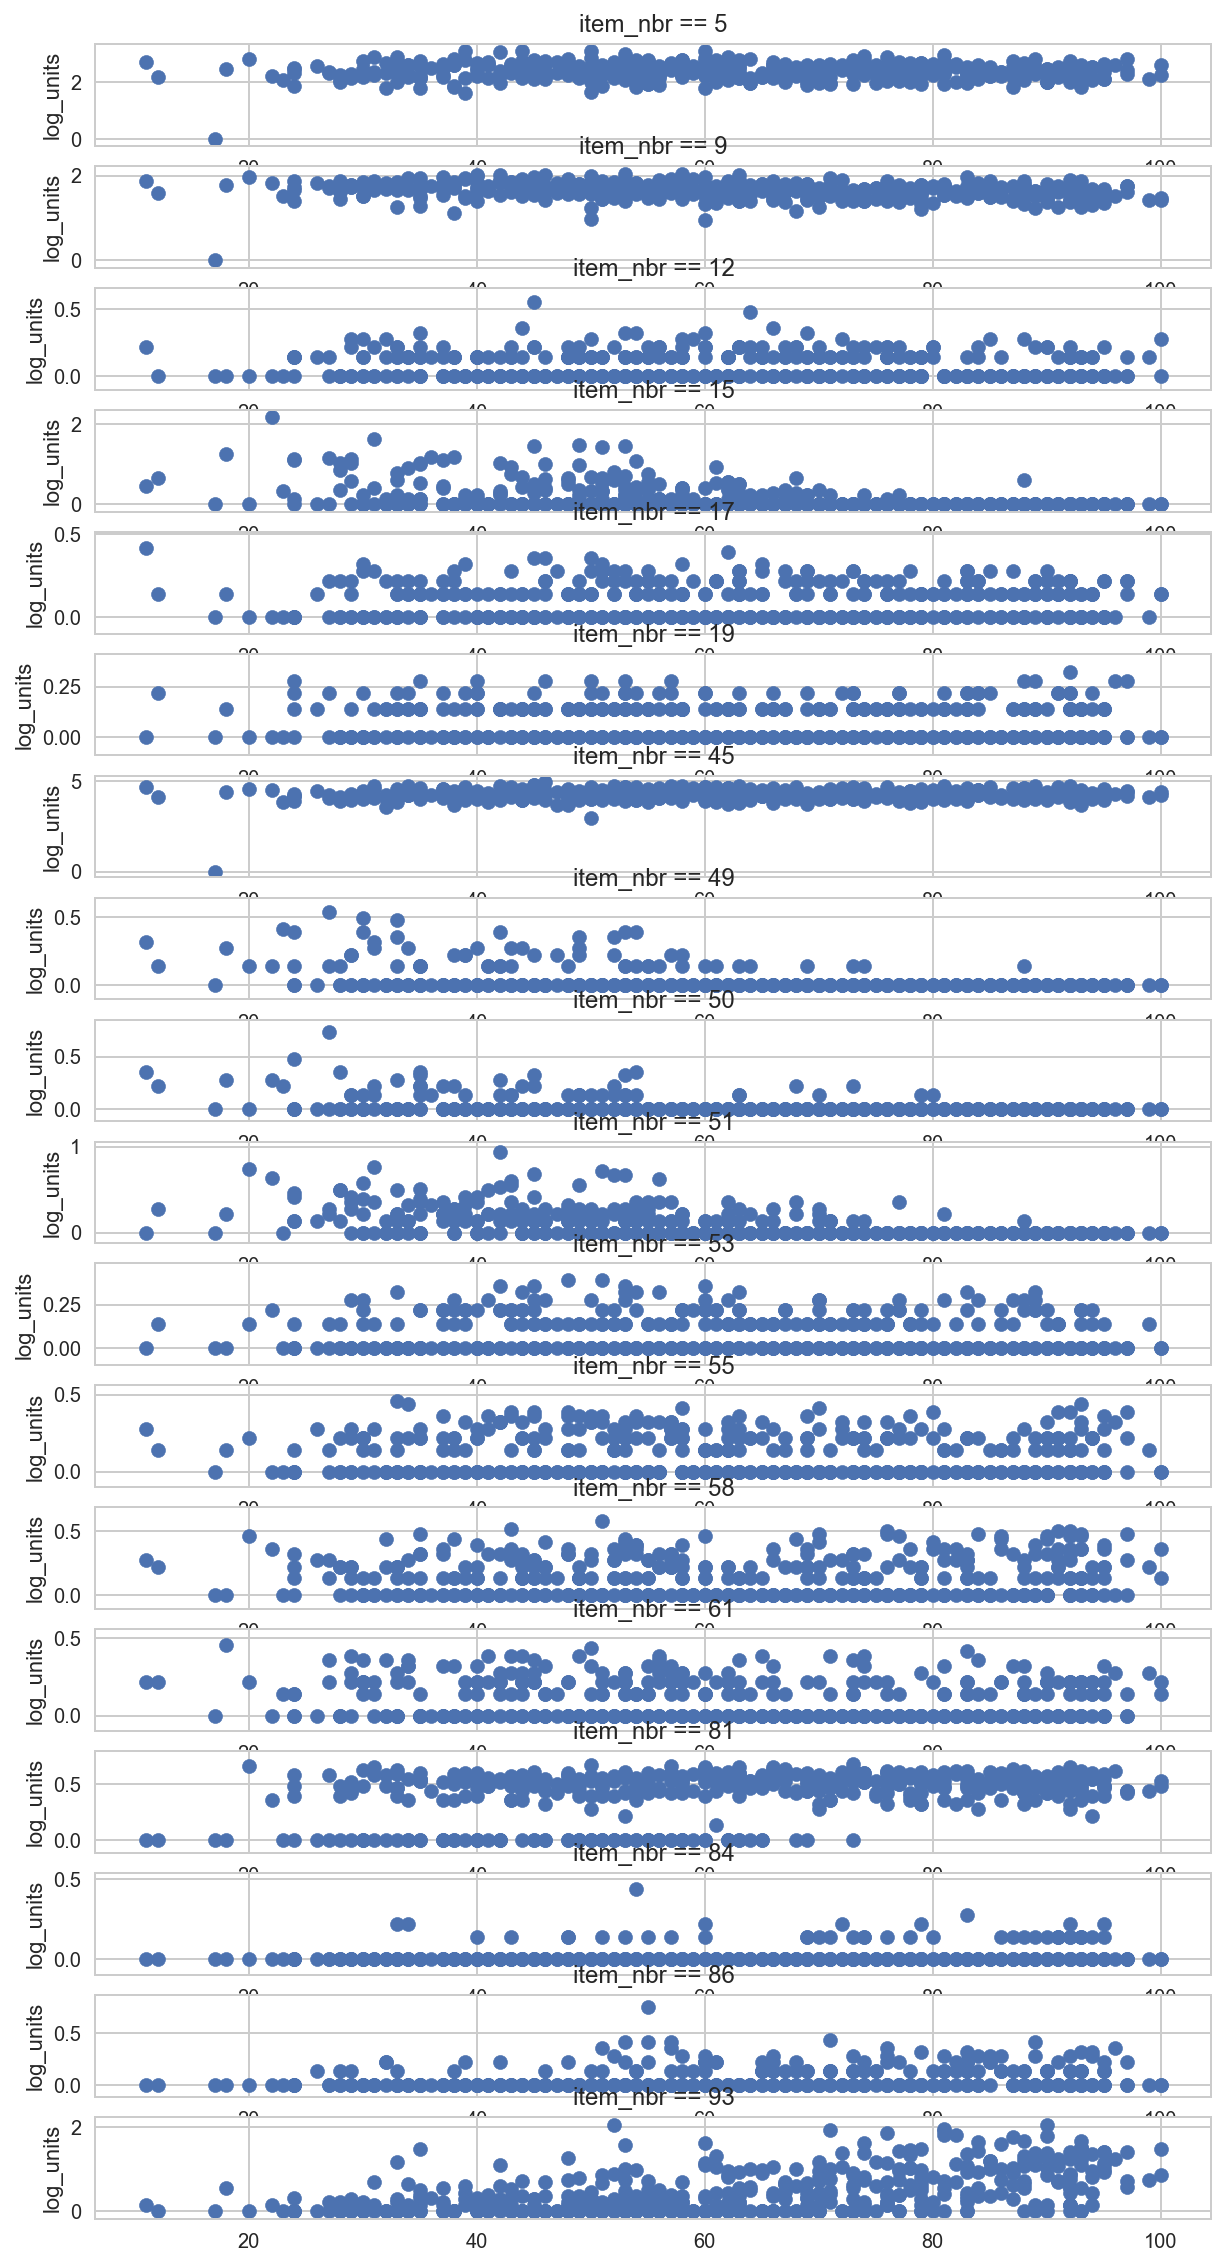

In [98]:
plt.figure(figsize = (10, 20))
plotcount = 1
for num in item_nbr_list_13 :
    plt.subplot(len(item_nbr_list_13), 1, plotcount)
    plt.scatter(x = merged_13['tmax'], y = merged_13[num]) # x에 들어가는 column을 바꿔가며 관계시각화 가능..pairplot은 왜 안되지 ㅅㅂ
    
    plt.ylabel('log_units')
#     plt.ylabel('log_units of item_nbr == {}'.format(num))

    plt.title('item_nbr == {}'.format(num))
        
    plotcount +=1

### station_nbr == 14
- store_nbr == 2, 6, 38, 42

In [84]:
result = pd.concat([train_new_2, train_new_6, train_new_38, train_new_42])

set_tmax(weather_train_14)
set_tmin(weather_train_14)
set_tavg(weather_train_14)
set_heat_cool(weather_train_14)

merged_14 = merge_weather_train(weather_train_14, result)
item_nbr_list_14 = get_item_nbr(merged_14)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


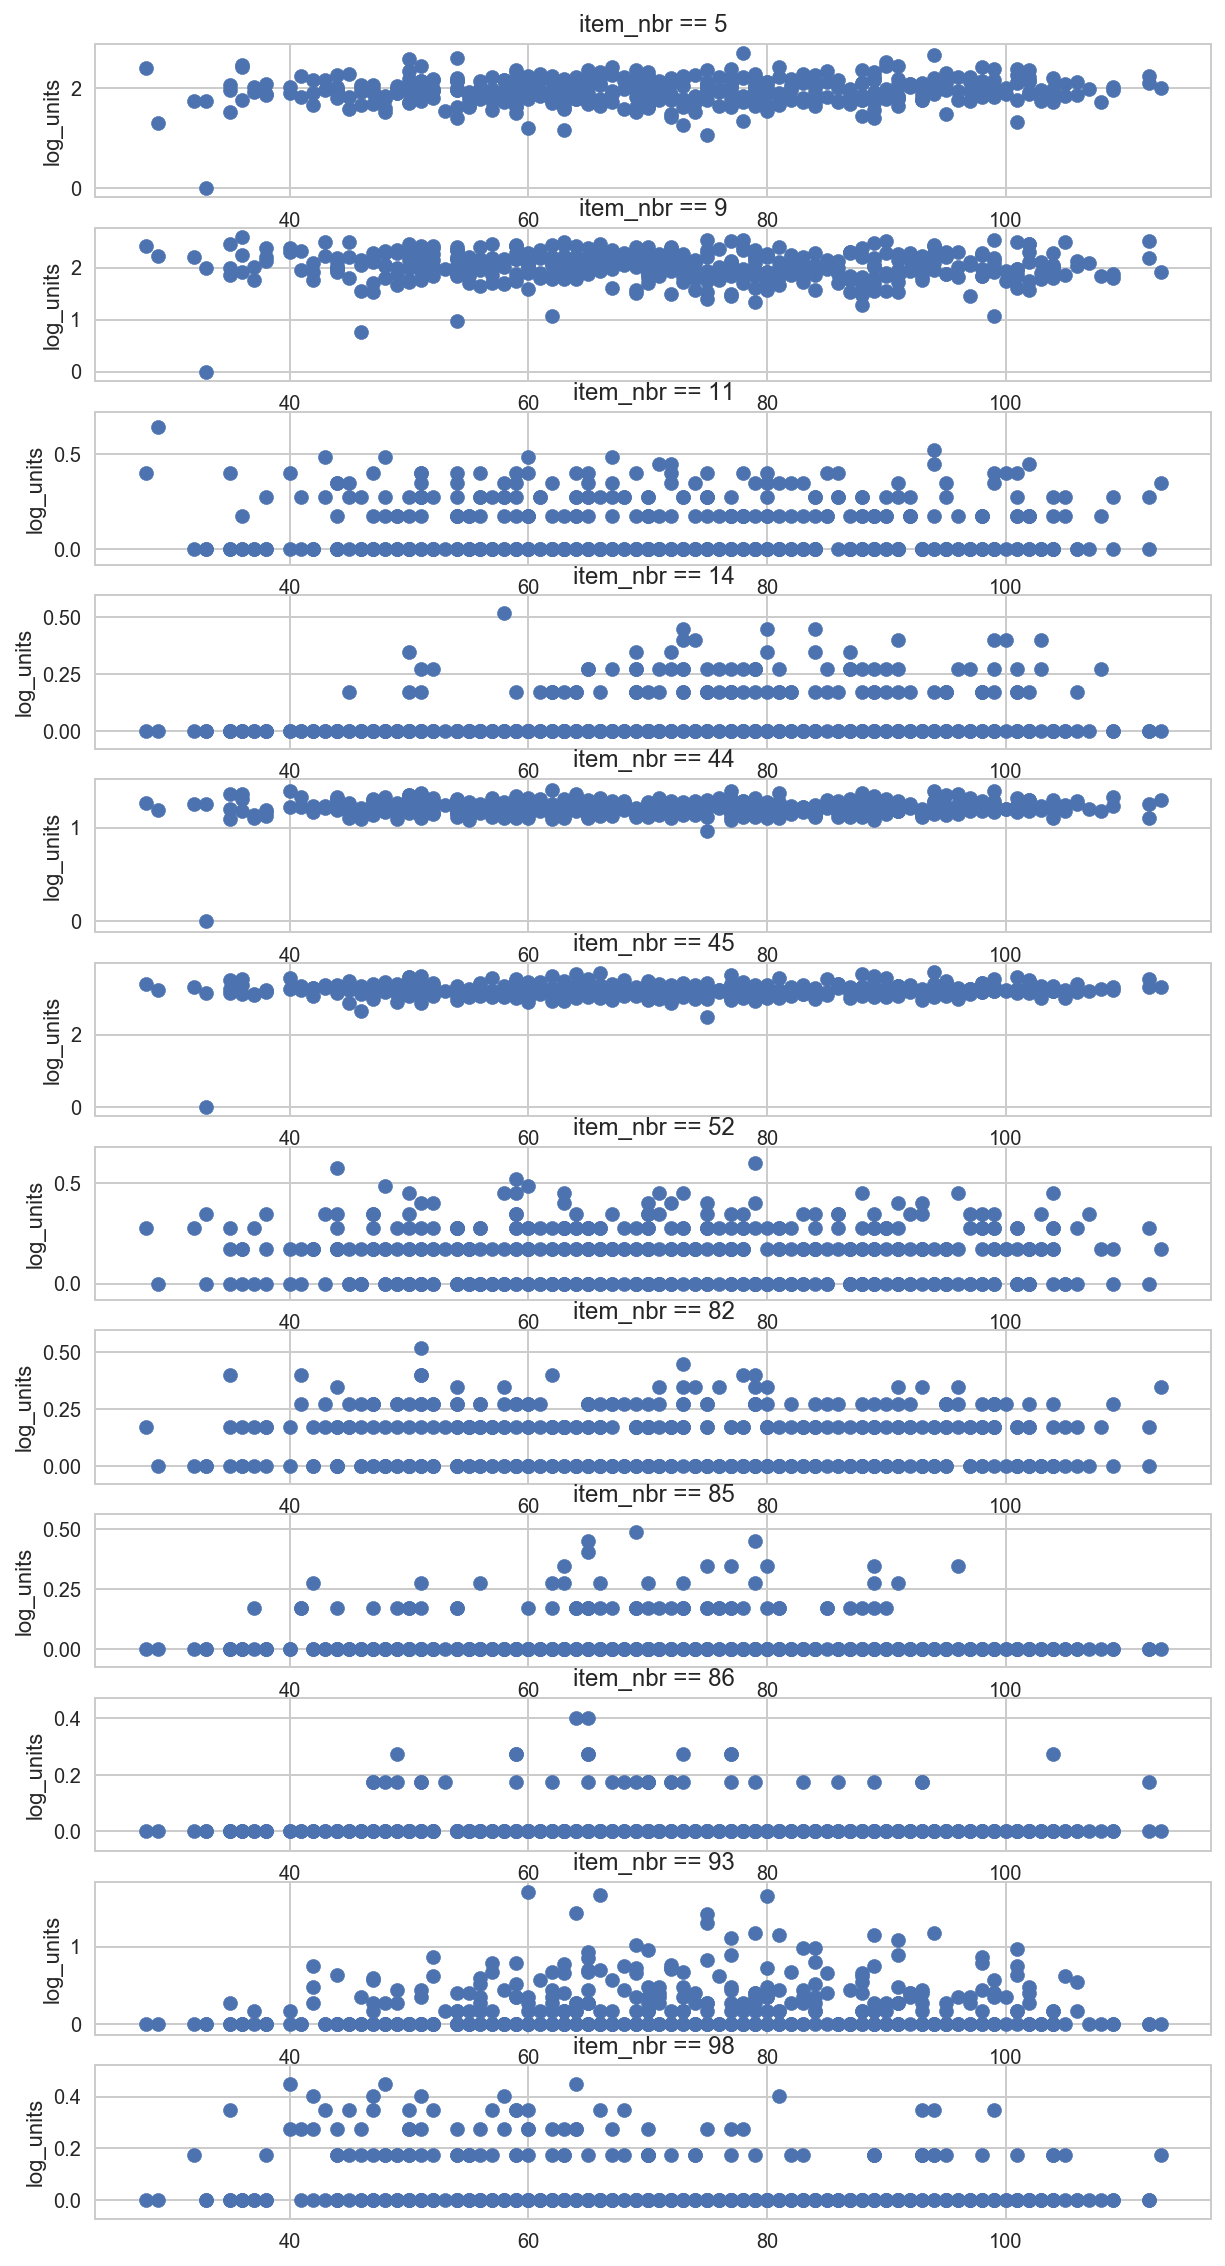

In [99]:
plt.figure(figsize = (10, 20))
plotcount = 1
for num in item_nbr_list_14 :
    plt.subplot(len(item_nbr_list_14), 1, plotcount)
    plt.scatter(x = merged_14['tmax'], y = merged_14[num]) # x에 들어가는 column을 바꿔가며 관계시각화 가능..pairplot은 왜 안되지 ㅅㅂ
    
    plt.ylabel('log_units')
#     plt.ylabel('log_units of item_nbr == {}'.format(num))

    plt.title('item_nbr == {}'.format(num))
        
    plotcount +=1

### station_nbr == 15
- store_nbr == 19

In [85]:
set_tmax(weather_train_15)
set_tmin(weather_train_15)
set_tavg(weather_train_15)
set_heat_cool(weather_train_15)

merged_15 = merge_weather_train(weather_train_15, train_new_19)
item_nbr_list_15 = get_item_nbr(merged_15)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


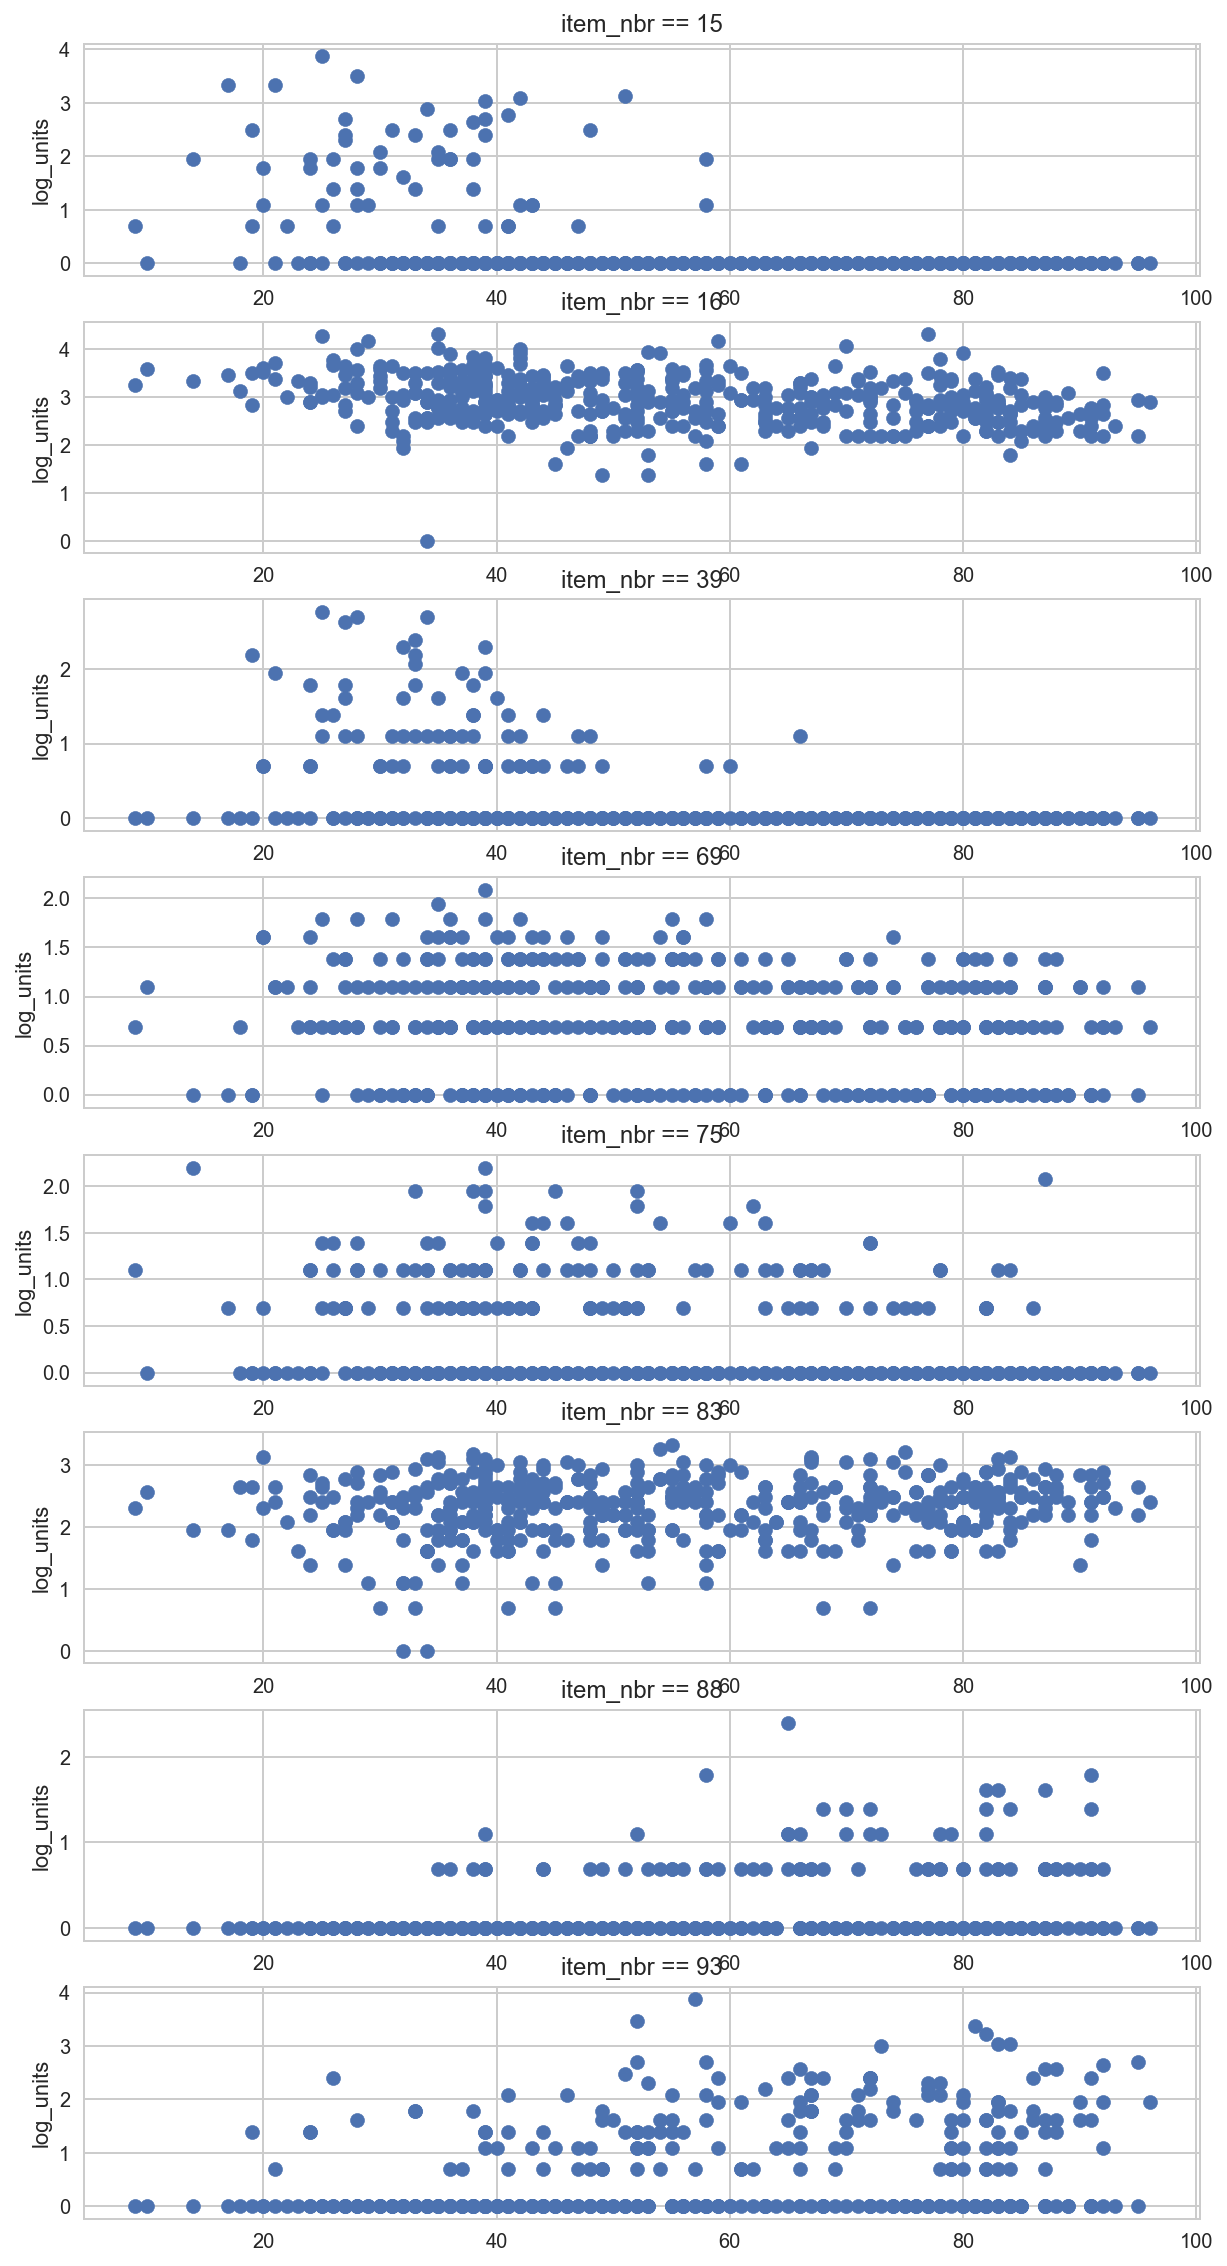

In [100]:
plt.figure(figsize = (10, 20))
plotcount = 1
for num in item_nbr_list_15 :
    plt.subplot(len(item_nbr_list_15), 1, plotcount)
    plt.scatter(x = merged_15['tmax'], y = merged_15[num]) # x에 들어가는 column을 바꿔가며 관계시각화 가능..pairplot은 왜 안되지 ㅅㅂ
    
    plt.ylabel('log_units')
#     plt.ylabel('log_units of item_nbr == {}'.format(num))

    plt.title('item_nbr == {}'.format(num))
        
    plotcount +=1

### station_nbr == 16
- store_nbr == 14, 45

In [86]:
result = pd.concat([train_new_14, train_new_45])

set_tmax(weather_train_16)
set_tmin(weather_train_16)
set_tavg(weather_train_16)
set_heat_cool(weather_train_16)

merged_16 = merge_weather_train(weather_train_16, result)
item_nbr_list_16 = get_item_nbr(merged_16)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


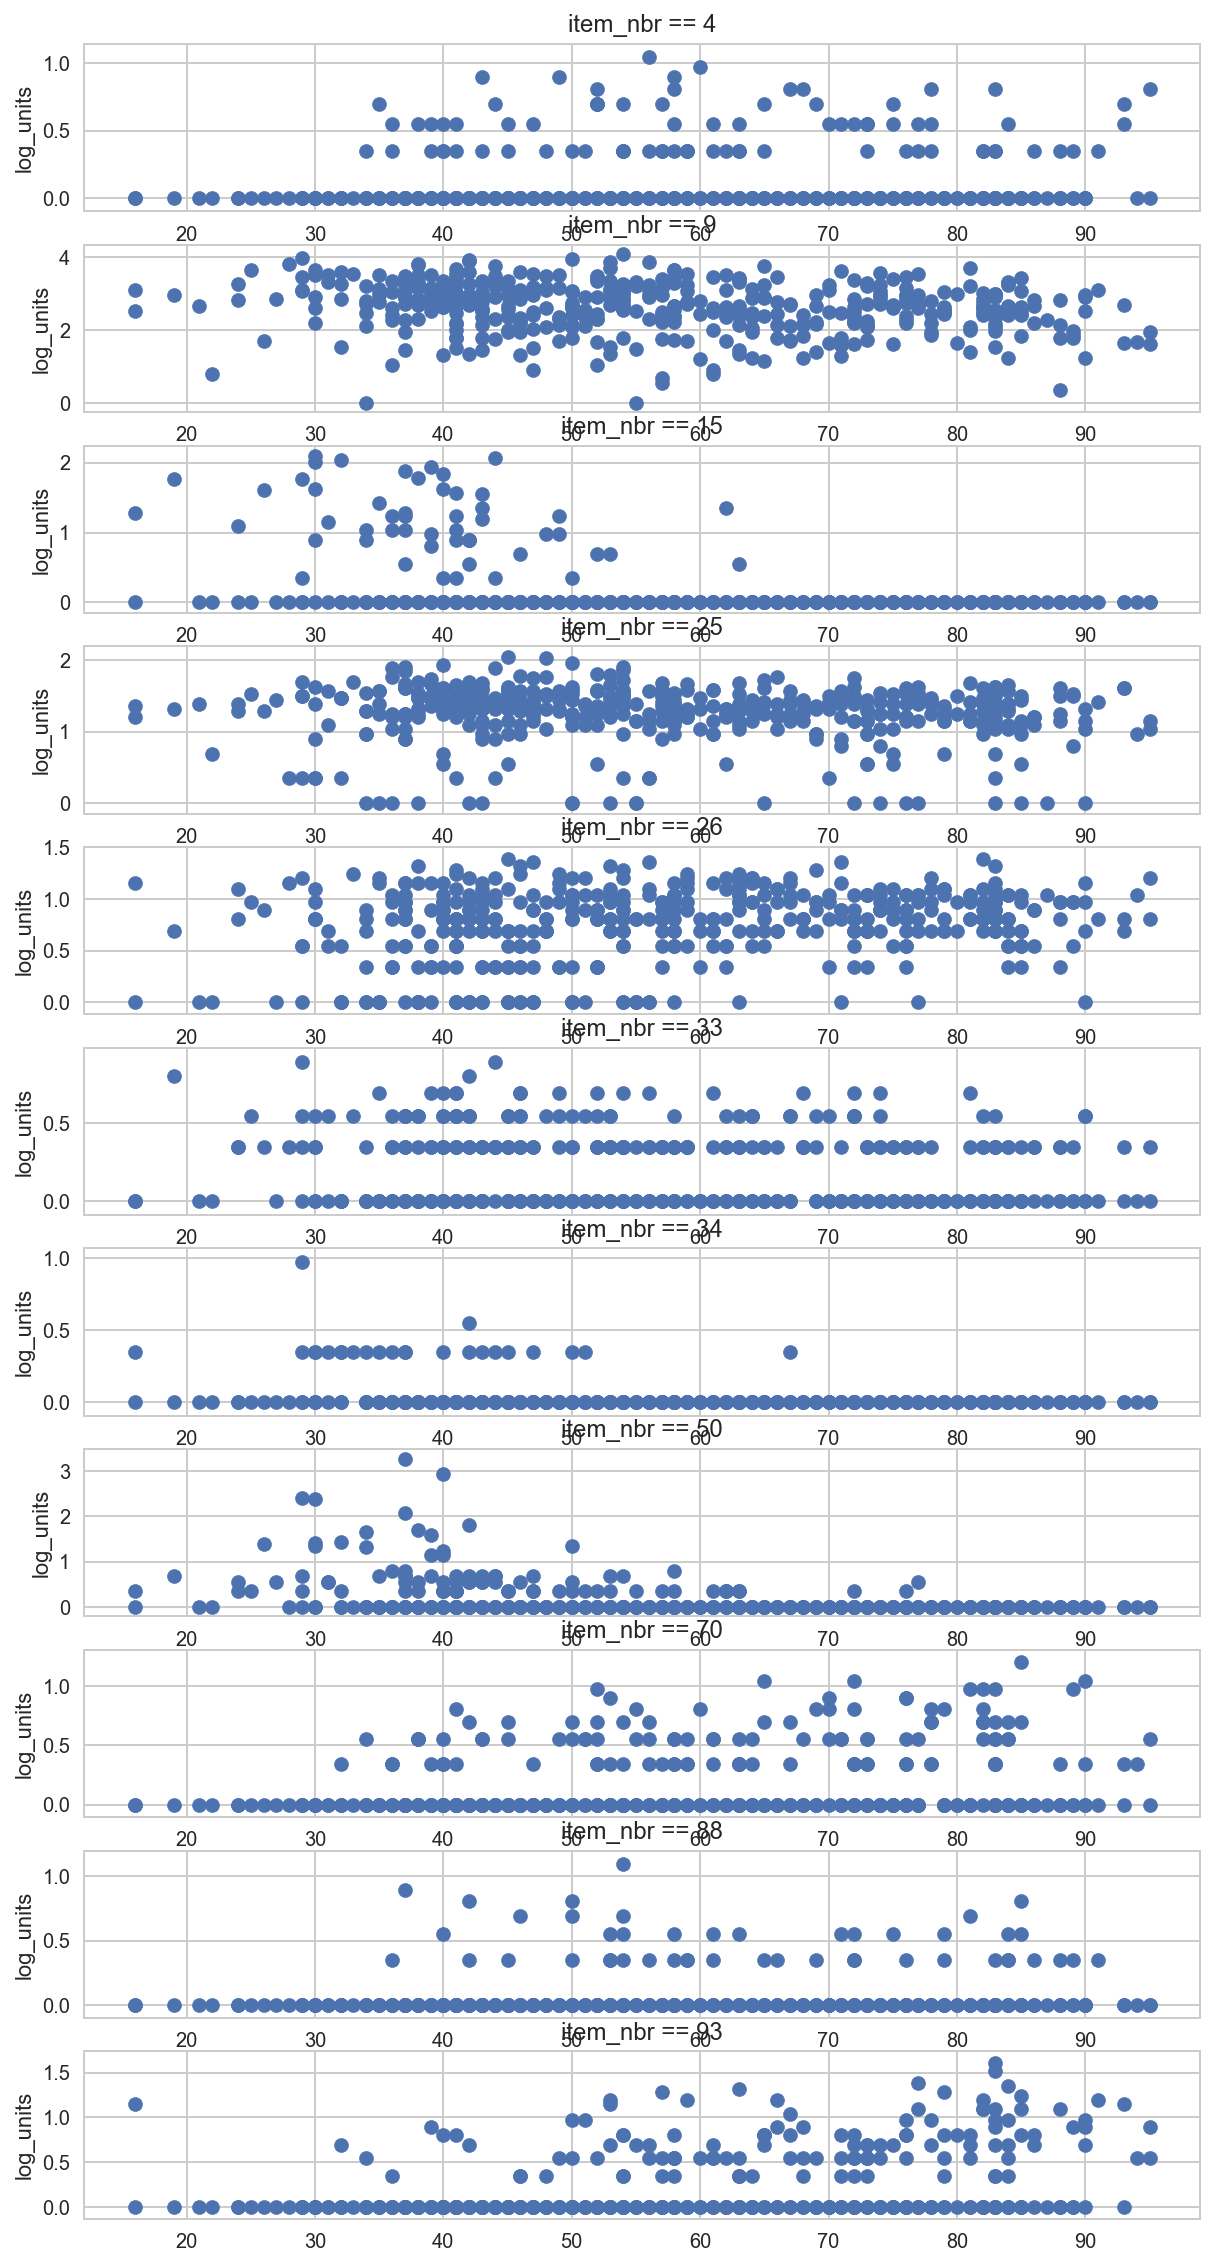

In [101]:
plt.figure(figsize = (10, 20))
plotcount = 1
for num in item_nbr_list_16 :
    plt.subplot(len(item_nbr_list_16), 1, plotcount)
    plt.scatter(x = merged_16['tmax'], y = merged_16[num]) # x에 들어가는 column을 바꿔가며 관계시각화 가능..pairplot은 왜 안되지 ㅅㅂ
    
    plt.ylabel('log_units')
#     plt.ylabel('log_units of item_nbr == {}'.format(num))

    plt.title('item_nbr == {}'.format(num))
        
    plotcount +=1

### station_nbr == 17
- store_nbr == 9, 18, 23, 26, 31, 34

In [87]:
result = pd.concat([train_new_9, train_new_18, train_new_23, train_new_26, train_new_31, train_new_34])

set_tmax(weather_train_17)
set_tmin(weather_train_17)
set_tavg(weather_train_17)
set_heat_cool(weather_train_17)

merged_17 = merge_weather_train(weather_train_17, result)
item_nbr_list_17 = get_item_nbr(merged_17)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


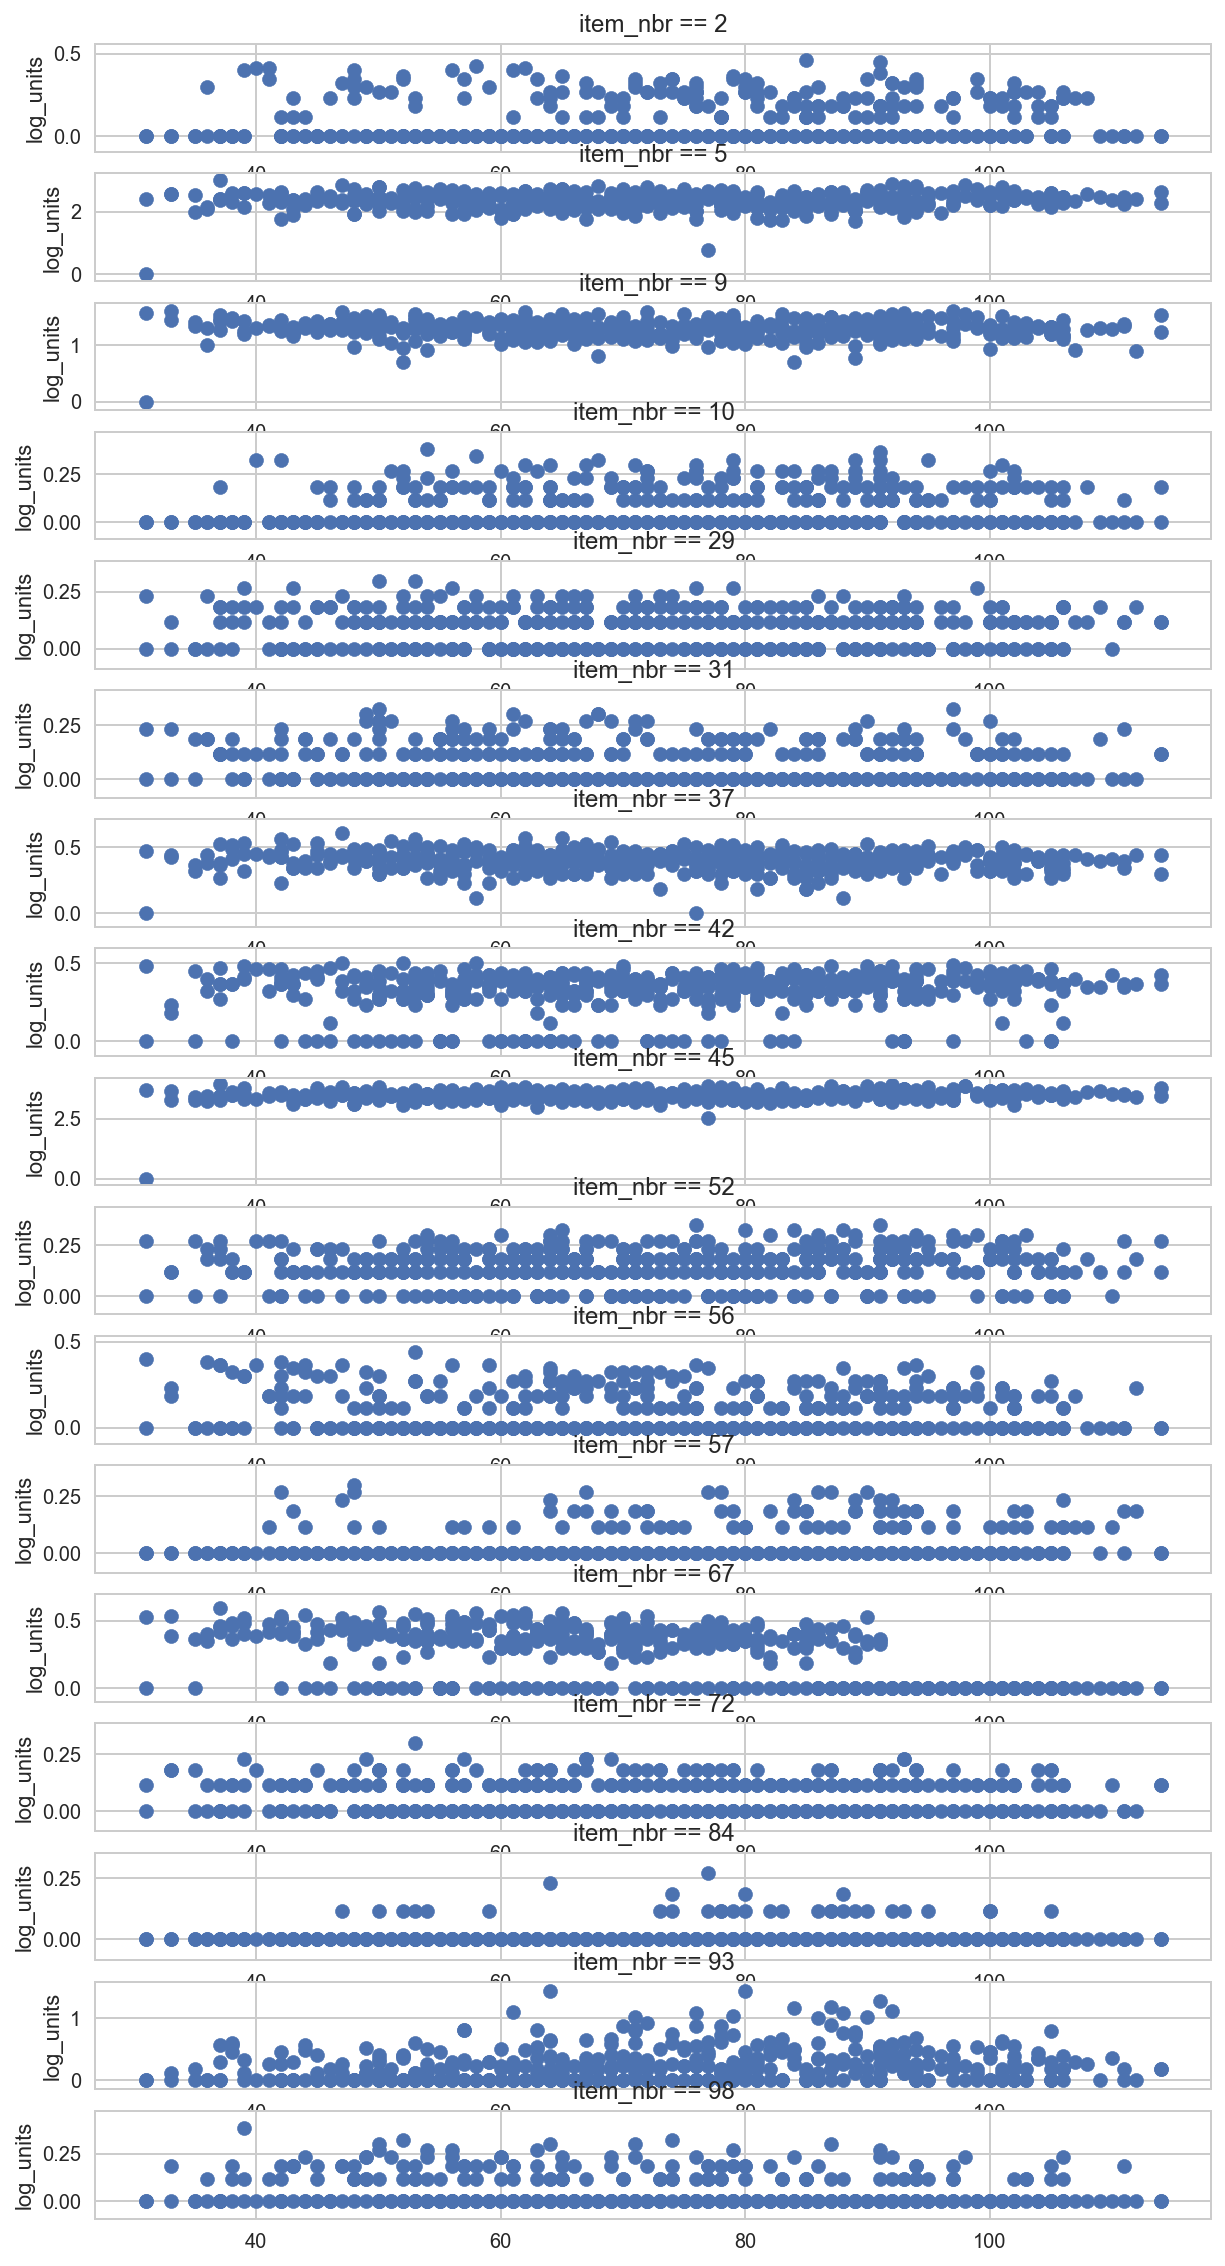

In [102]:
plt.figure(figsize = (10, 20))
plotcount = 1
for num in item_nbr_list_17 :
    plt.subplot(len(item_nbr_list_17), 1, plotcount)
    plt.scatter(x = merged_17['tmax'], y = merged_17[num]) # x에 들어가는 column을 바꿔가며 관계시각화 가능..pairplot은 왜 안되지 ㅅㅂ
    
    plt.ylabel('log_units')
#     plt.ylabel('log_units of item_nbr == {}'.format(num))

    plt.title('item_nbr == {}'.format(num))
        
    plotcount +=1

### station_nbr == 18
- store_nbr == 36

In [88]:
set_tmax(weather_train_18)
set_tmin(weather_train_18)
set_tavg(weather_train_18)
set_heat_cool(weather_train_18)

merged_18 = merge_weather_train(weather_train_18, train_new_36)
item_nbr_list_18 = get_item_nbr(merged_18)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


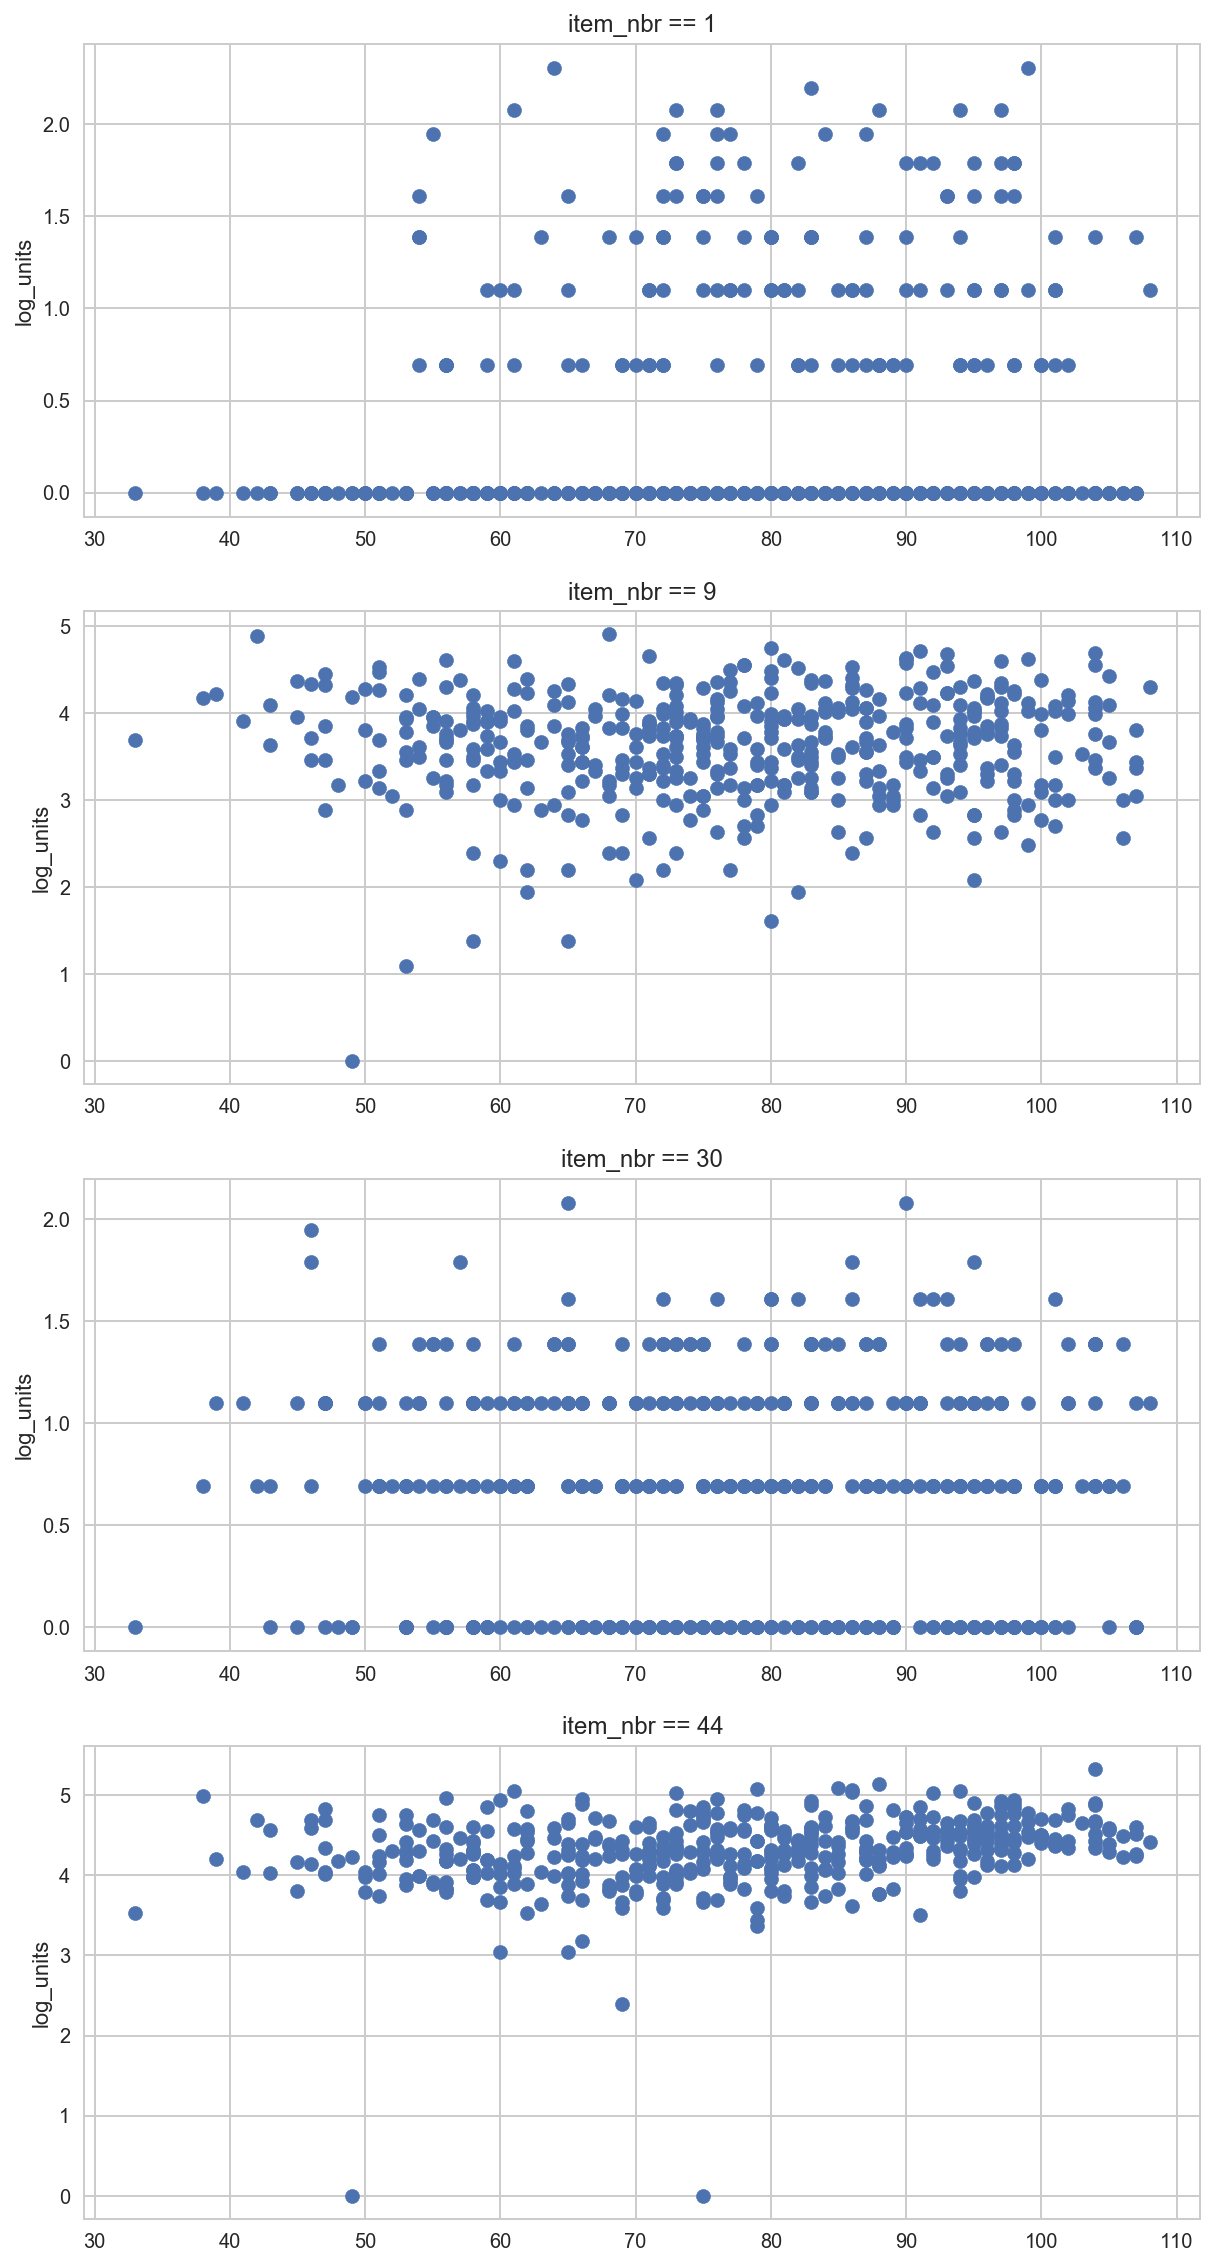

In [103]:
plt.figure(figsize = (10, 20))
plotcount = 1
for num in item_nbr_list_18 :
    plt.subplot(len(item_nbr_list_18), 1, plotcount)
    plt.scatter(x = merged_18['tmax'], y = merged_18[num]) # x에 들어가는 column을 바꿔가며 관계시각화 가능..pairplot은 왜 안되지 ㅅㅂ
    
    plt.ylabel('log_units')
#     plt.ylabel('log_units of item_nbr == {}'.format(num))

    plt.title('item_nbr == {}'.format(num))
        
    plotcount +=1

### station_nbr == 19
- store_nbr == 30

In [89]:
set_tmax(weather_train_19)
set_tmin(weather_train_19)
set_tavg(weather_train_19)
set_heat_cool(weather_train_19)

merged_19 = merge_weather_train(weather_train_19, train_new_30)
item_nbr_list_19 = get_item_nbr(merged_19)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### station_nbr == 20
- store_nbr == 17

In [ ]:
set_tmax(weather_train_20)
set_tmin(weather_train_20)
set_tavg(weather_train_20)
set_heat_cool(weather_train_20)

merged_20 = merge_weather_train(weather_train_20, train_new_17)
item_nbr_list_20 = get_item_nbr(merged_20)